In [1]:
import sys
sys.path.append('..')
import re

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import load_model
from utils.utils_classes import RReLU
from utils.load_data import load_dataset
import shap
import seaborn as sns
root_path="C://Users//noemi//Desktop//university//university//tesi/Thesis-XAI/"

Using TensorFlow backend.


In [20]:
with open(root_path + '/resources/data_deep/data_ordered/Xtest_ordered.pkl', 'rb') as f:
    Xtest = pickle.load(f)


(3297, 10, 512, 1)


In [16]:
patient=1
path = root_path + "/resources/Grad-CAM method 2/gradcam_results_patient{}_conv_1D_method2.pkl".format(patient)
with open(path, 'rb') as f:
    gradcam = pickle.load(f)


In [10]:
saved_model = load_model(root_path + '/resources/Conv1D/Conv1D_pat_{}.h5'.format(patient),
                         custom_objects={'RReLU': RReLU})

In [11]:
classes = 8

In [12]:
## if mean for observation
for cls in range(classes):
    for index in range(gradcam[cls]["gradcam_values"].shape[0]):
        maximum_gd=gradcam[cls]["gradcam_values"][index].max()
        #print(maximum_gd)
        if maximum_gd!=0:
            gradcam[cls]["gradcam_values"][index]=gradcam[cls]["gradcam_values"][index]/maximum_gd

In [ ]:
mean_val=[]        
for cls in range(classes):
    #
    #maximum_gd=gradcam[cls]["gradcam_values"].max()
    #mean_val.append(np.average((gradcam[cls]["gradcam_values"]/maximum_gd), axis=2))
    mean_val.append(np.average((gradcam[cls]["gradcam_values"]), axis=2))
print((mean_val[2].shape))

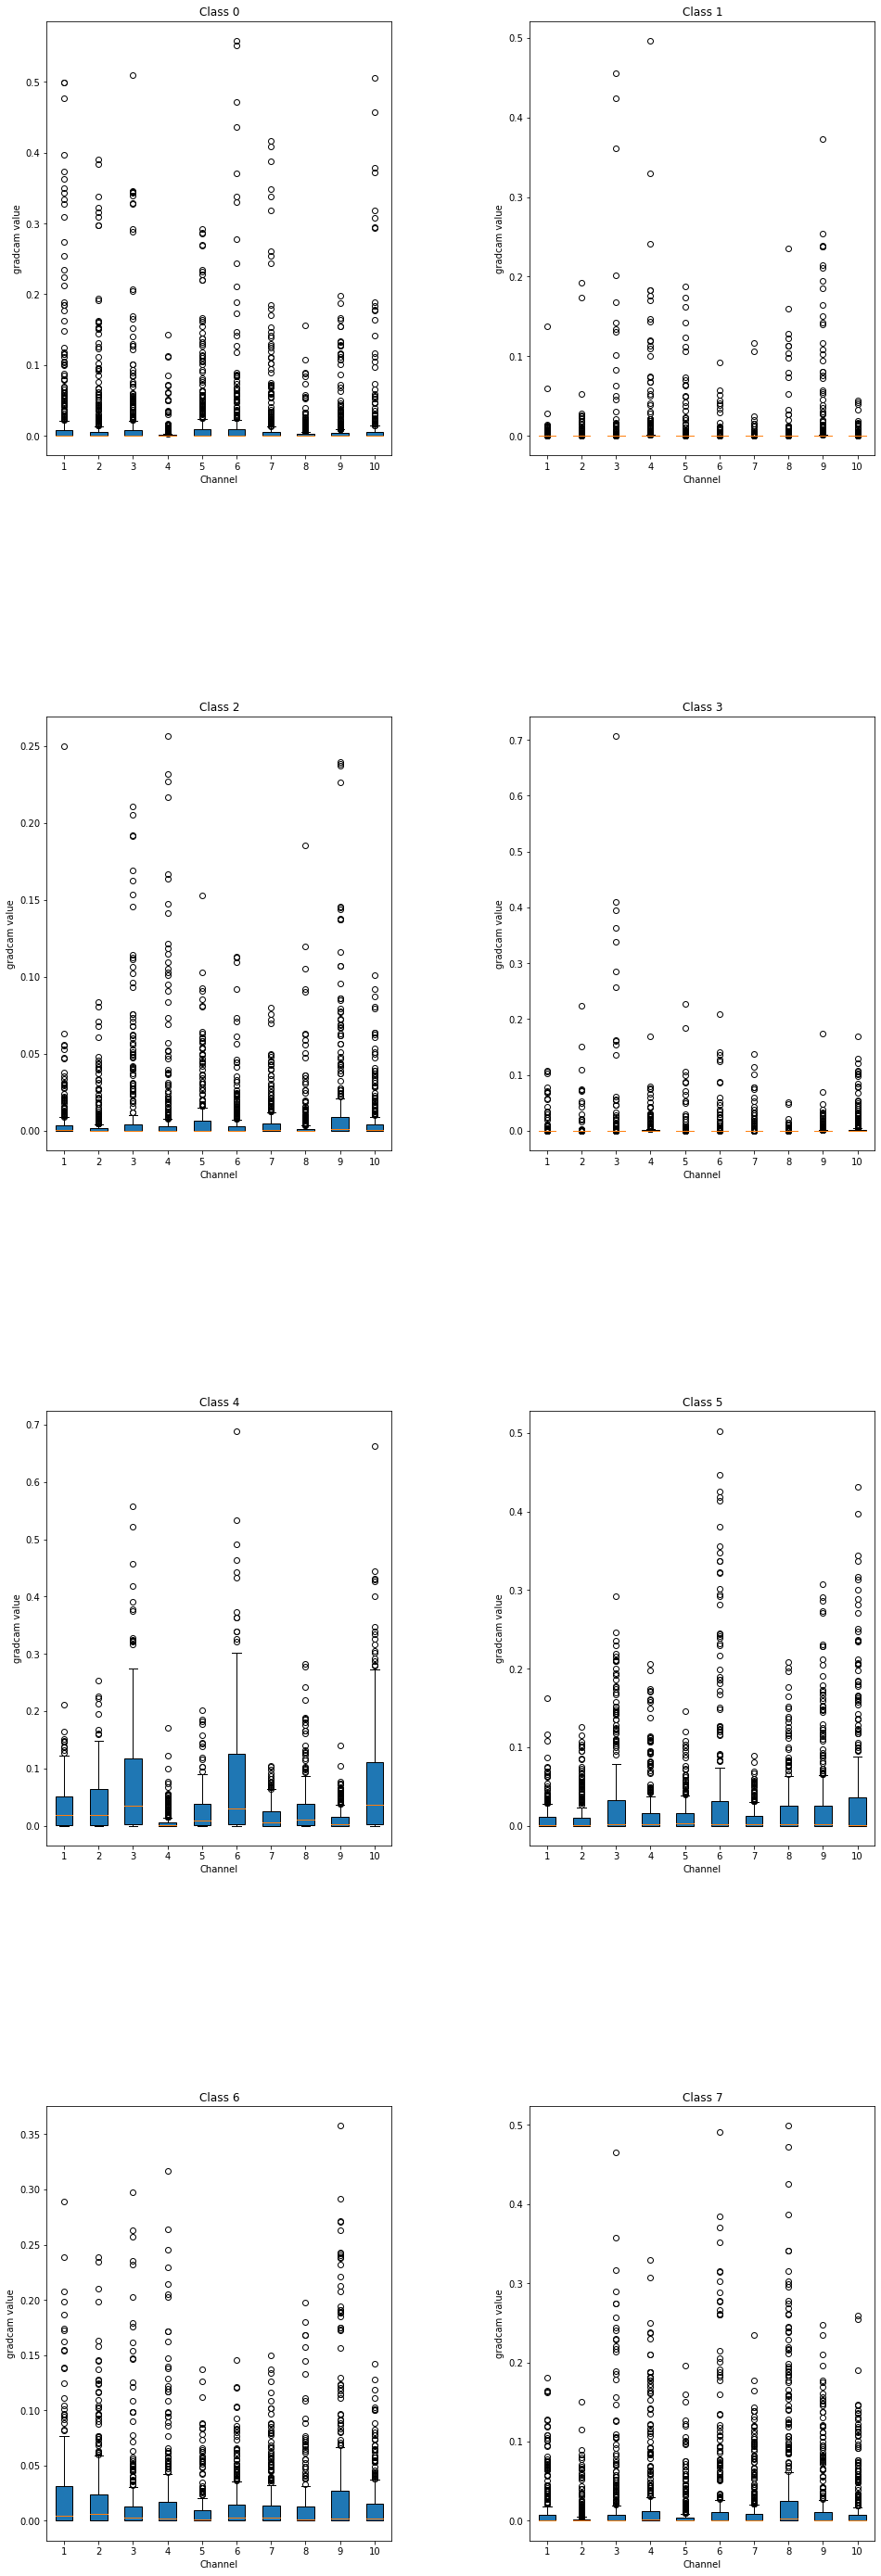

In [19]:
heigth=4;
width=2;
f, axes = plt.subplots(heigth, width,figsize=(16, 50))
f.subplots_adjust(hspace=0.6, wspace=0.4)
lst=[0,2,4,6]
for i, num in enumerate(lst):
    axes[i,0].boxplot(mean_val[num], patch_artist=True)
    axes[i,0].set(xlabel="Channel", ylabel="gradcam value")
    axes[i,0].set(title="Class {}".format(num))
    #axes[i,0].set_ylim(-0.000001, 0.00025)
    axes[i,1].boxplot(mean_val[num+1], patch_artist=True)
    axes[i,1].set(xlabel="Channel", ylabel="gradcam value")
    axes[i,1].set(title="Class {}".format(num+1))
    #axes[i,1].set_ylim(-0.001, 0.005)
plt.savefig(root_path+"/resources/grad_cam_boxplot_pat_{}".format(patient))

## GRADCAM for all patient

In [14]:
num_pat=11
for patient in range(1):  
    path = root_path + "/resources/Grad-CAM method 2/6 channels conv5/gradcam_results_patient{}_conv_2D_6channels_conv5.pkl".format(patient)
    with open(path, 'rb') as f:
        gradcam = pickle.load(f)
    saved_model = load_model(root_path + '/resources/new_models/conv5/Conv2D_6channels_pat_{}_nodense.h5'.format(patient),
                             custom_objects={'RReLU': RReLU})
    classes = 8

(201, 6)
(199, 6)
(315, 6)
(202, 6)
(208, 6)
(203, 6)
(181, 6)
(129, 6)
(184, 6)
(232, 6)
(222, 6)


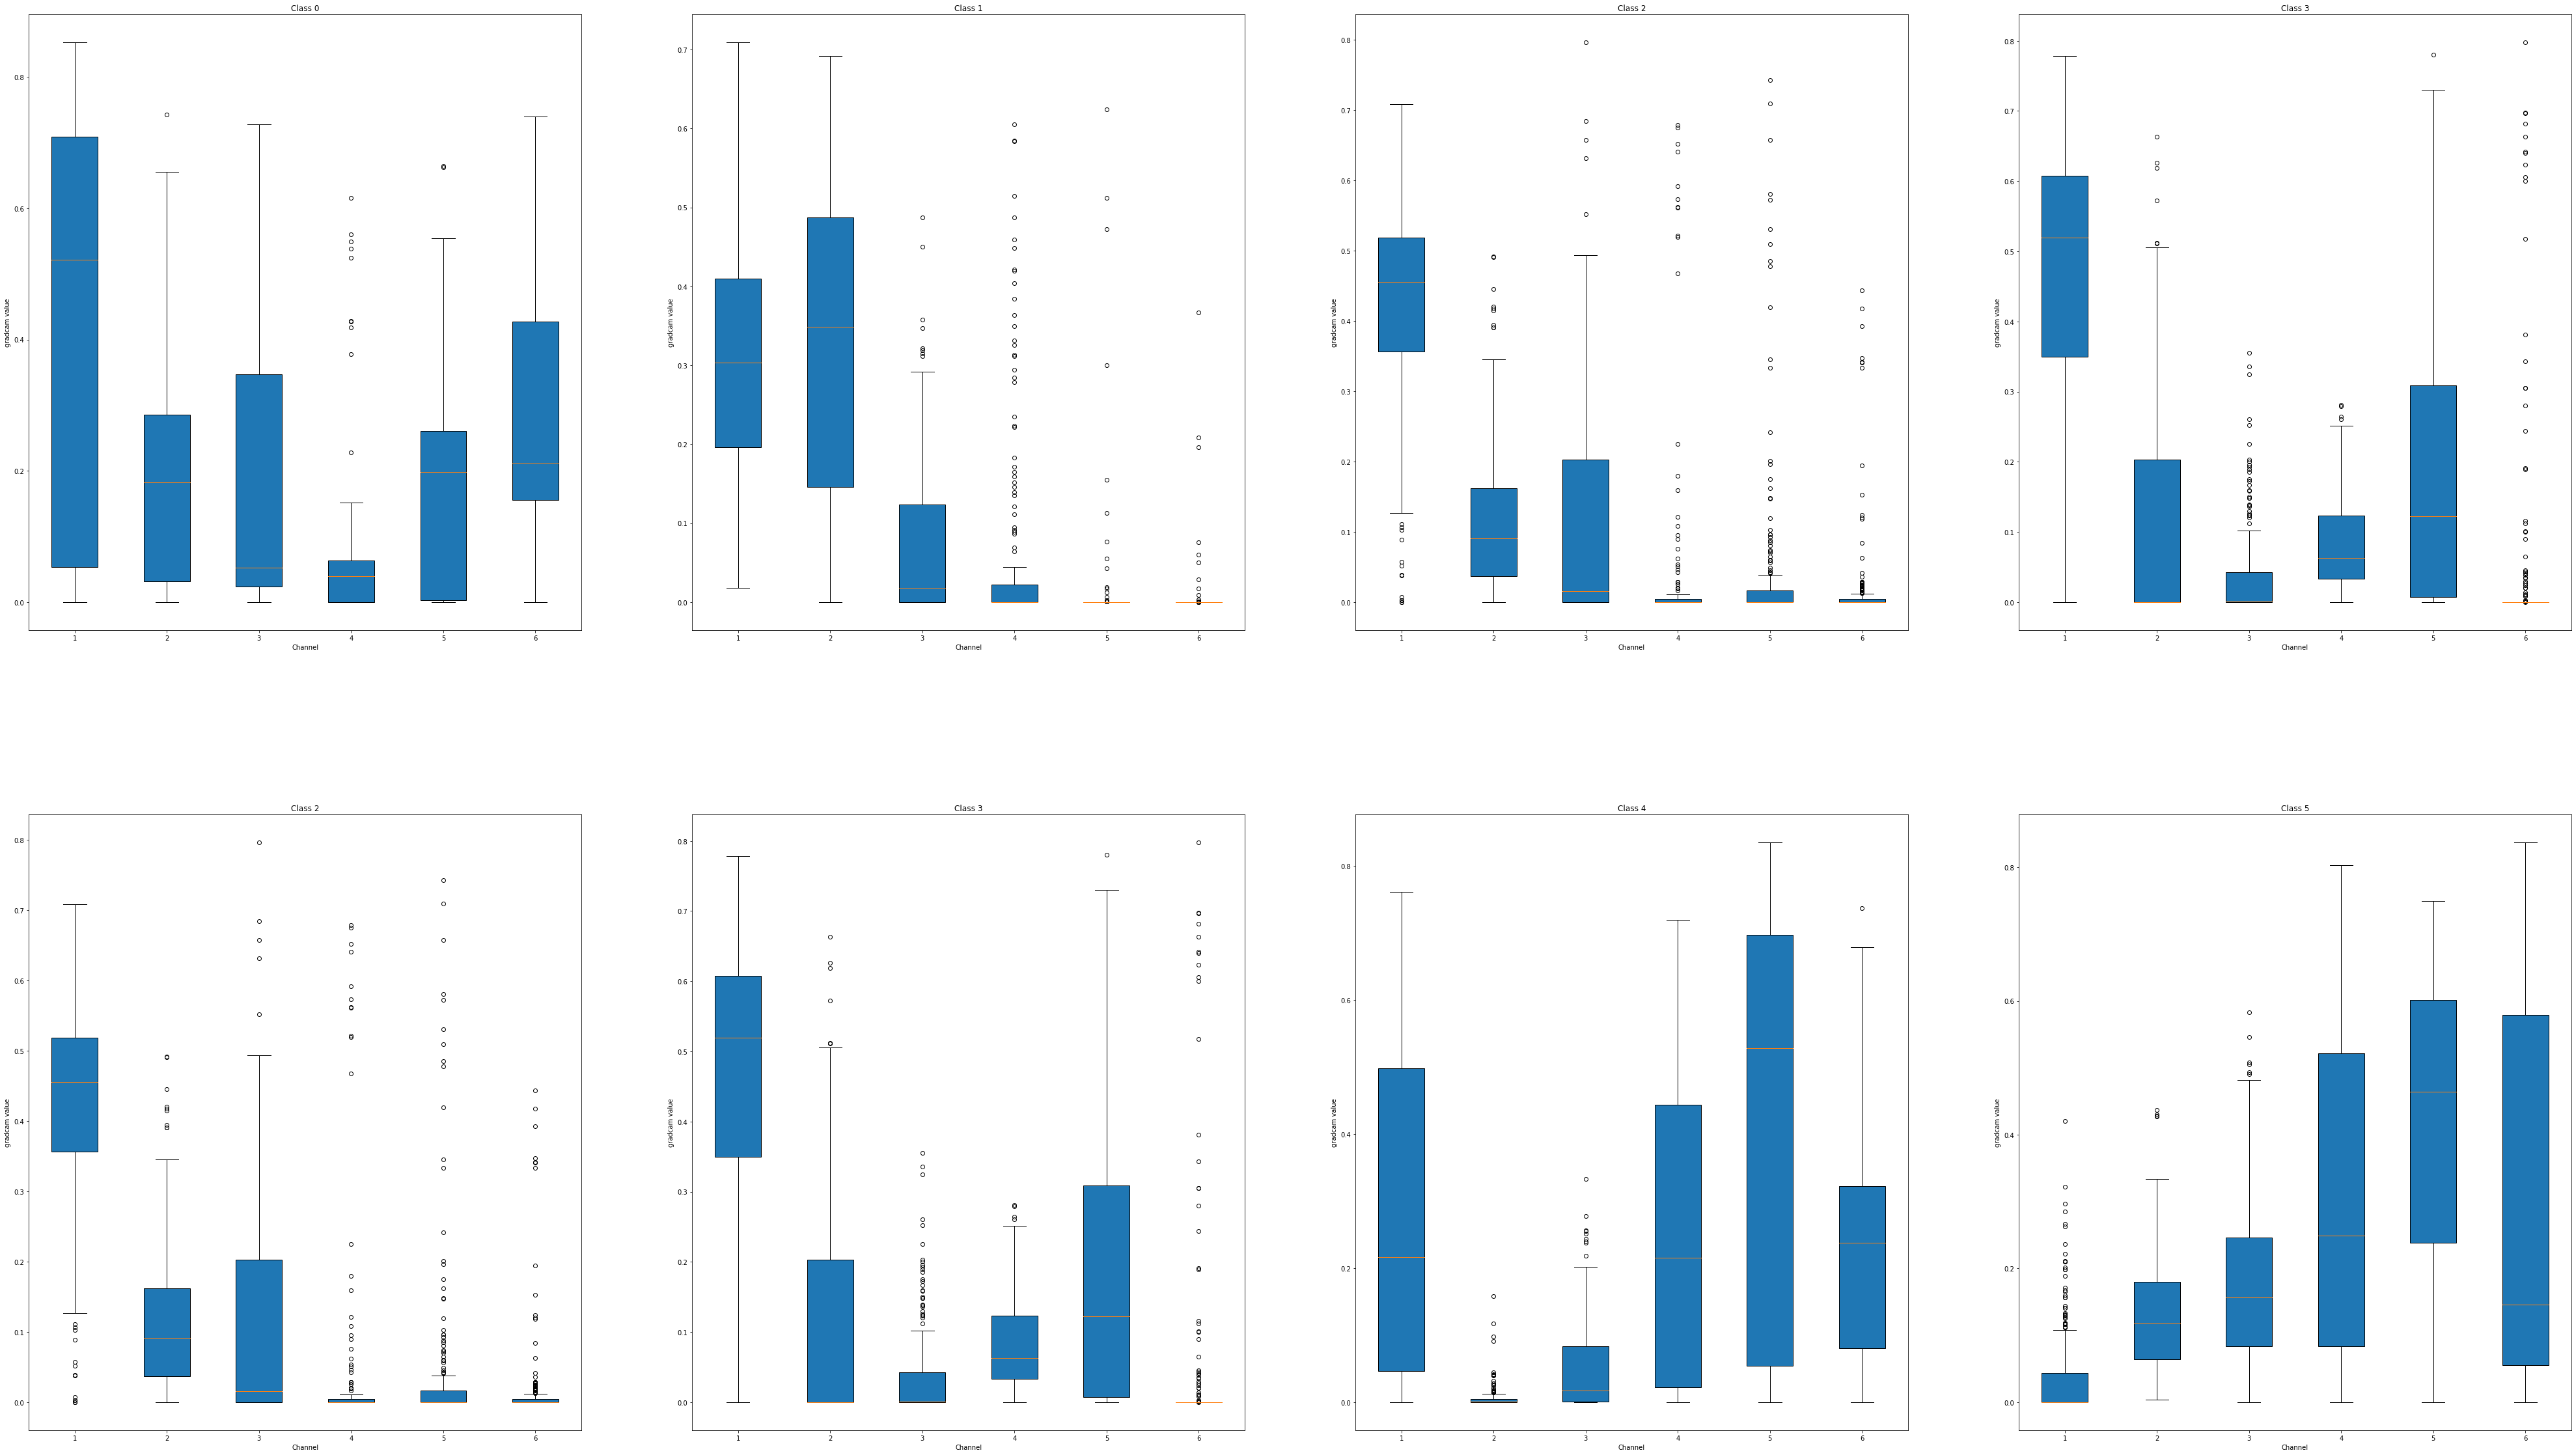

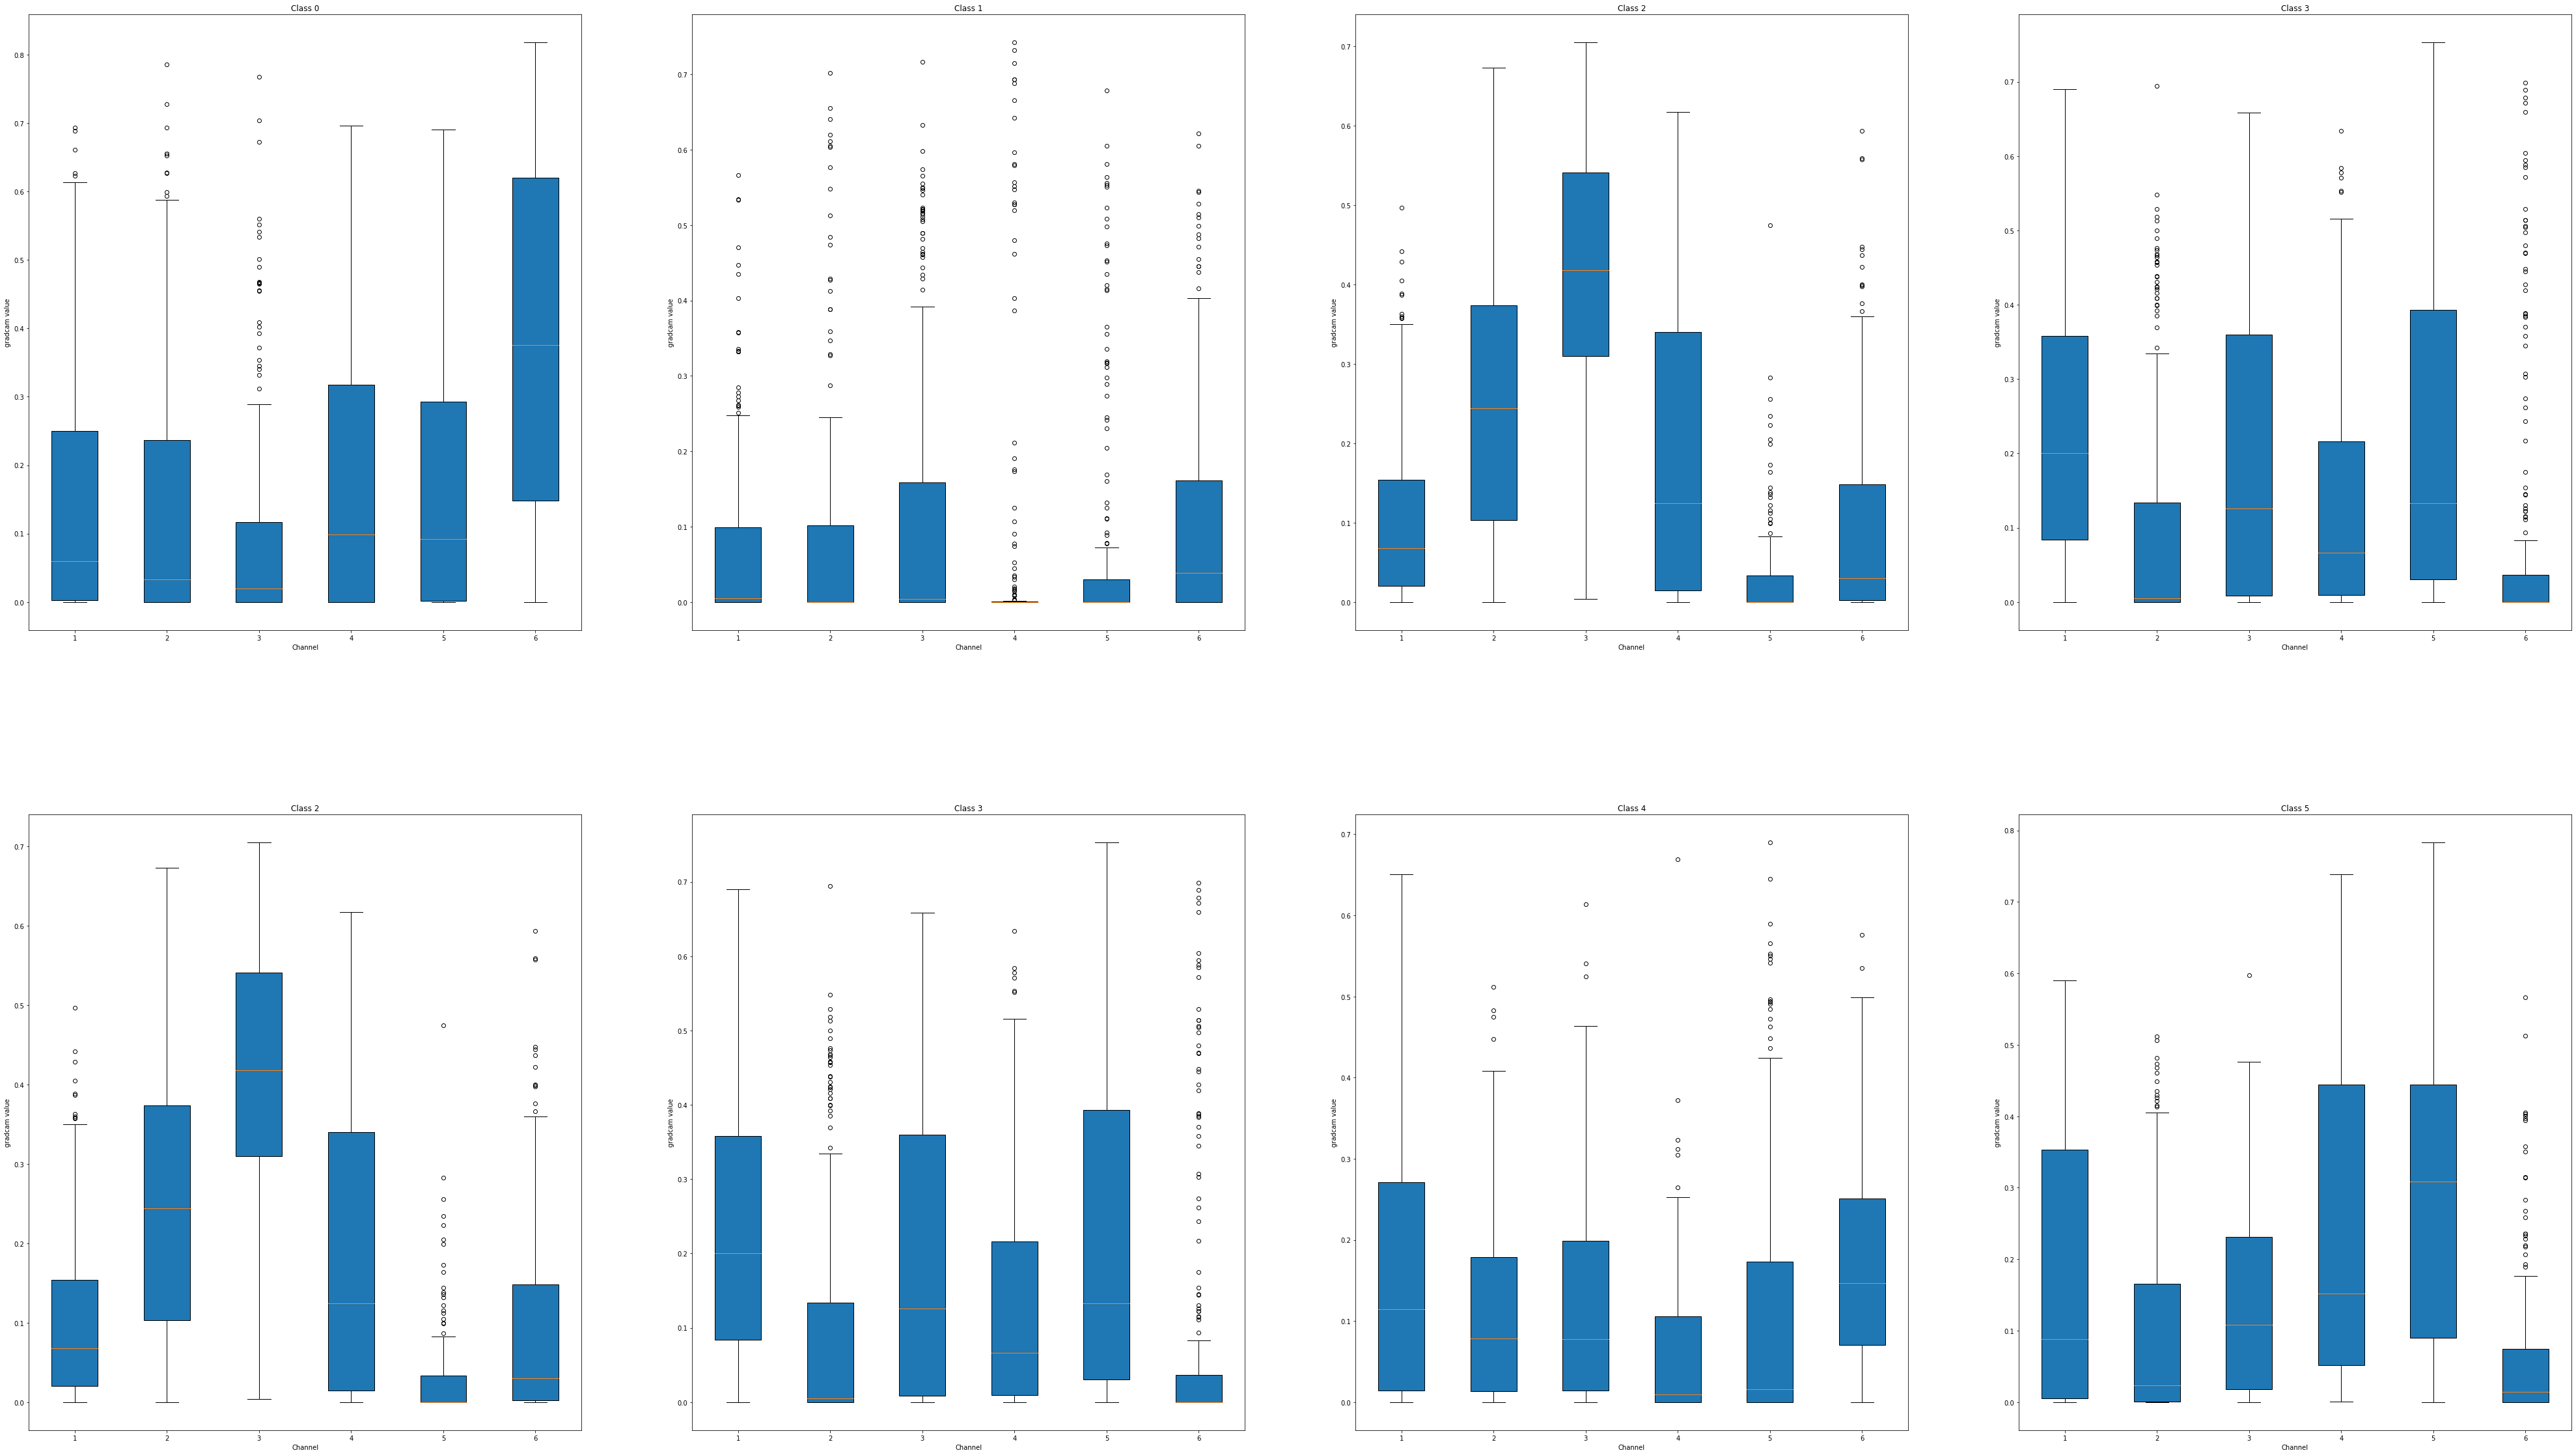

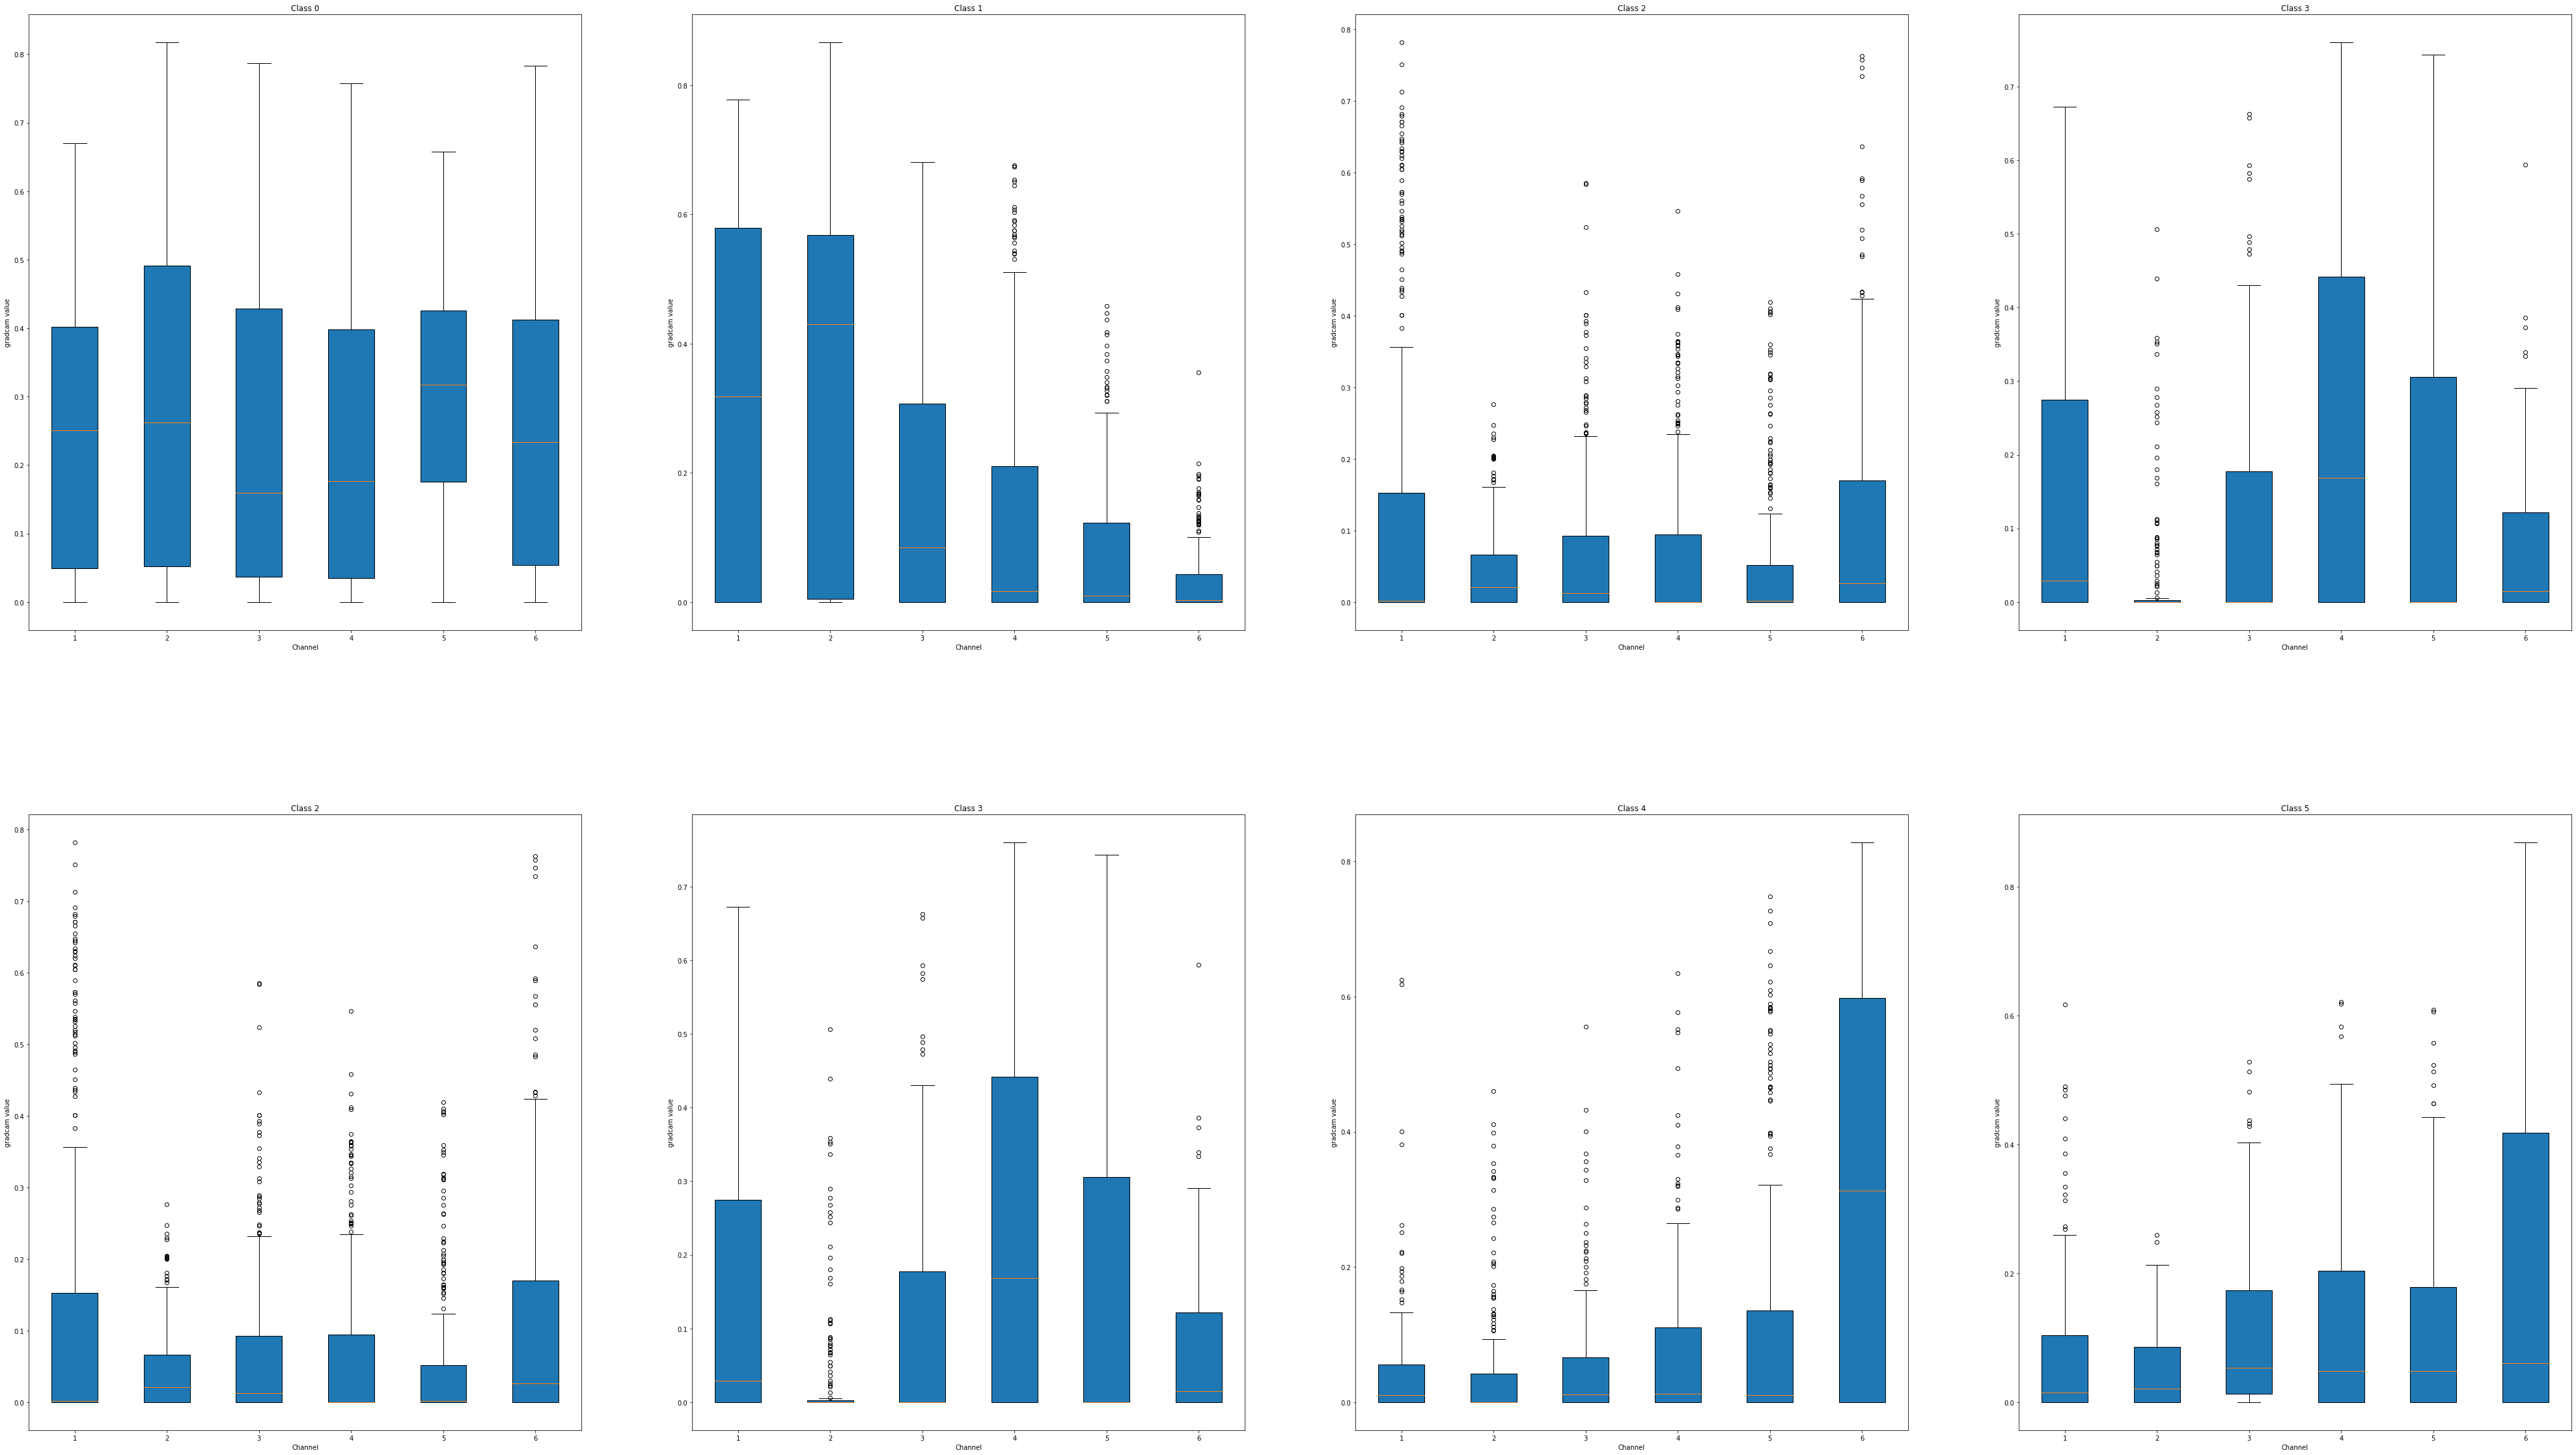

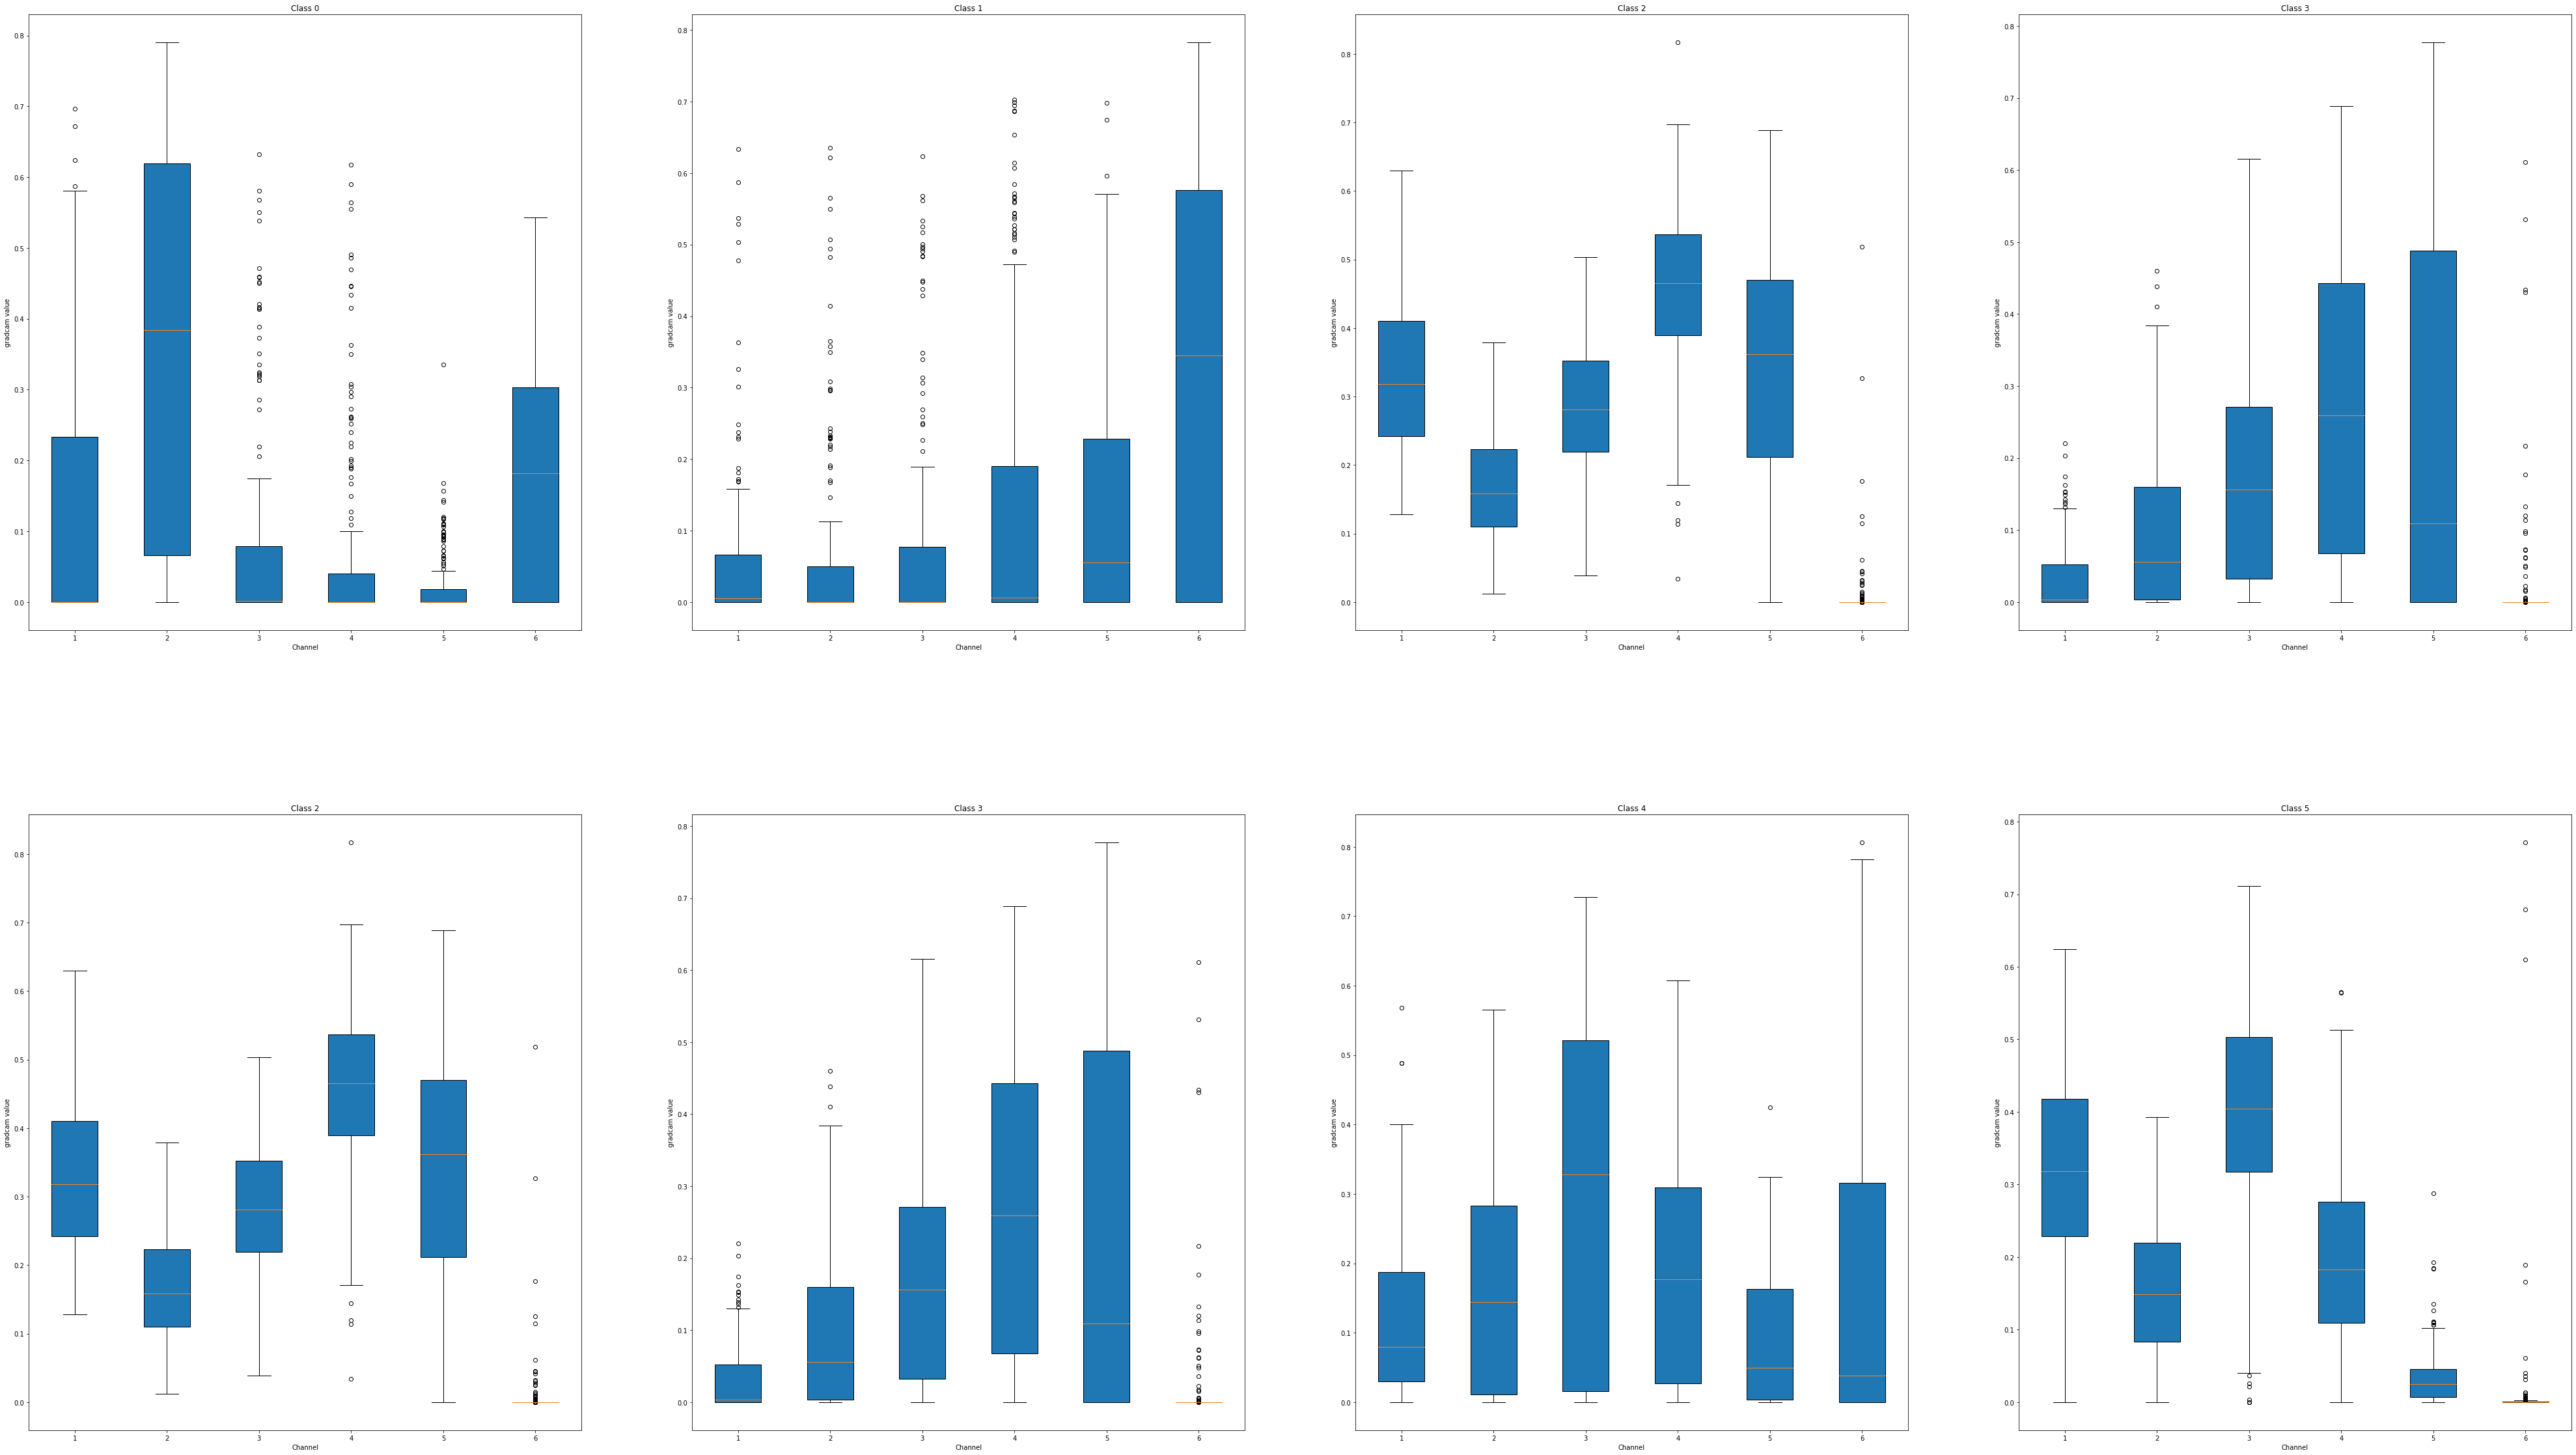

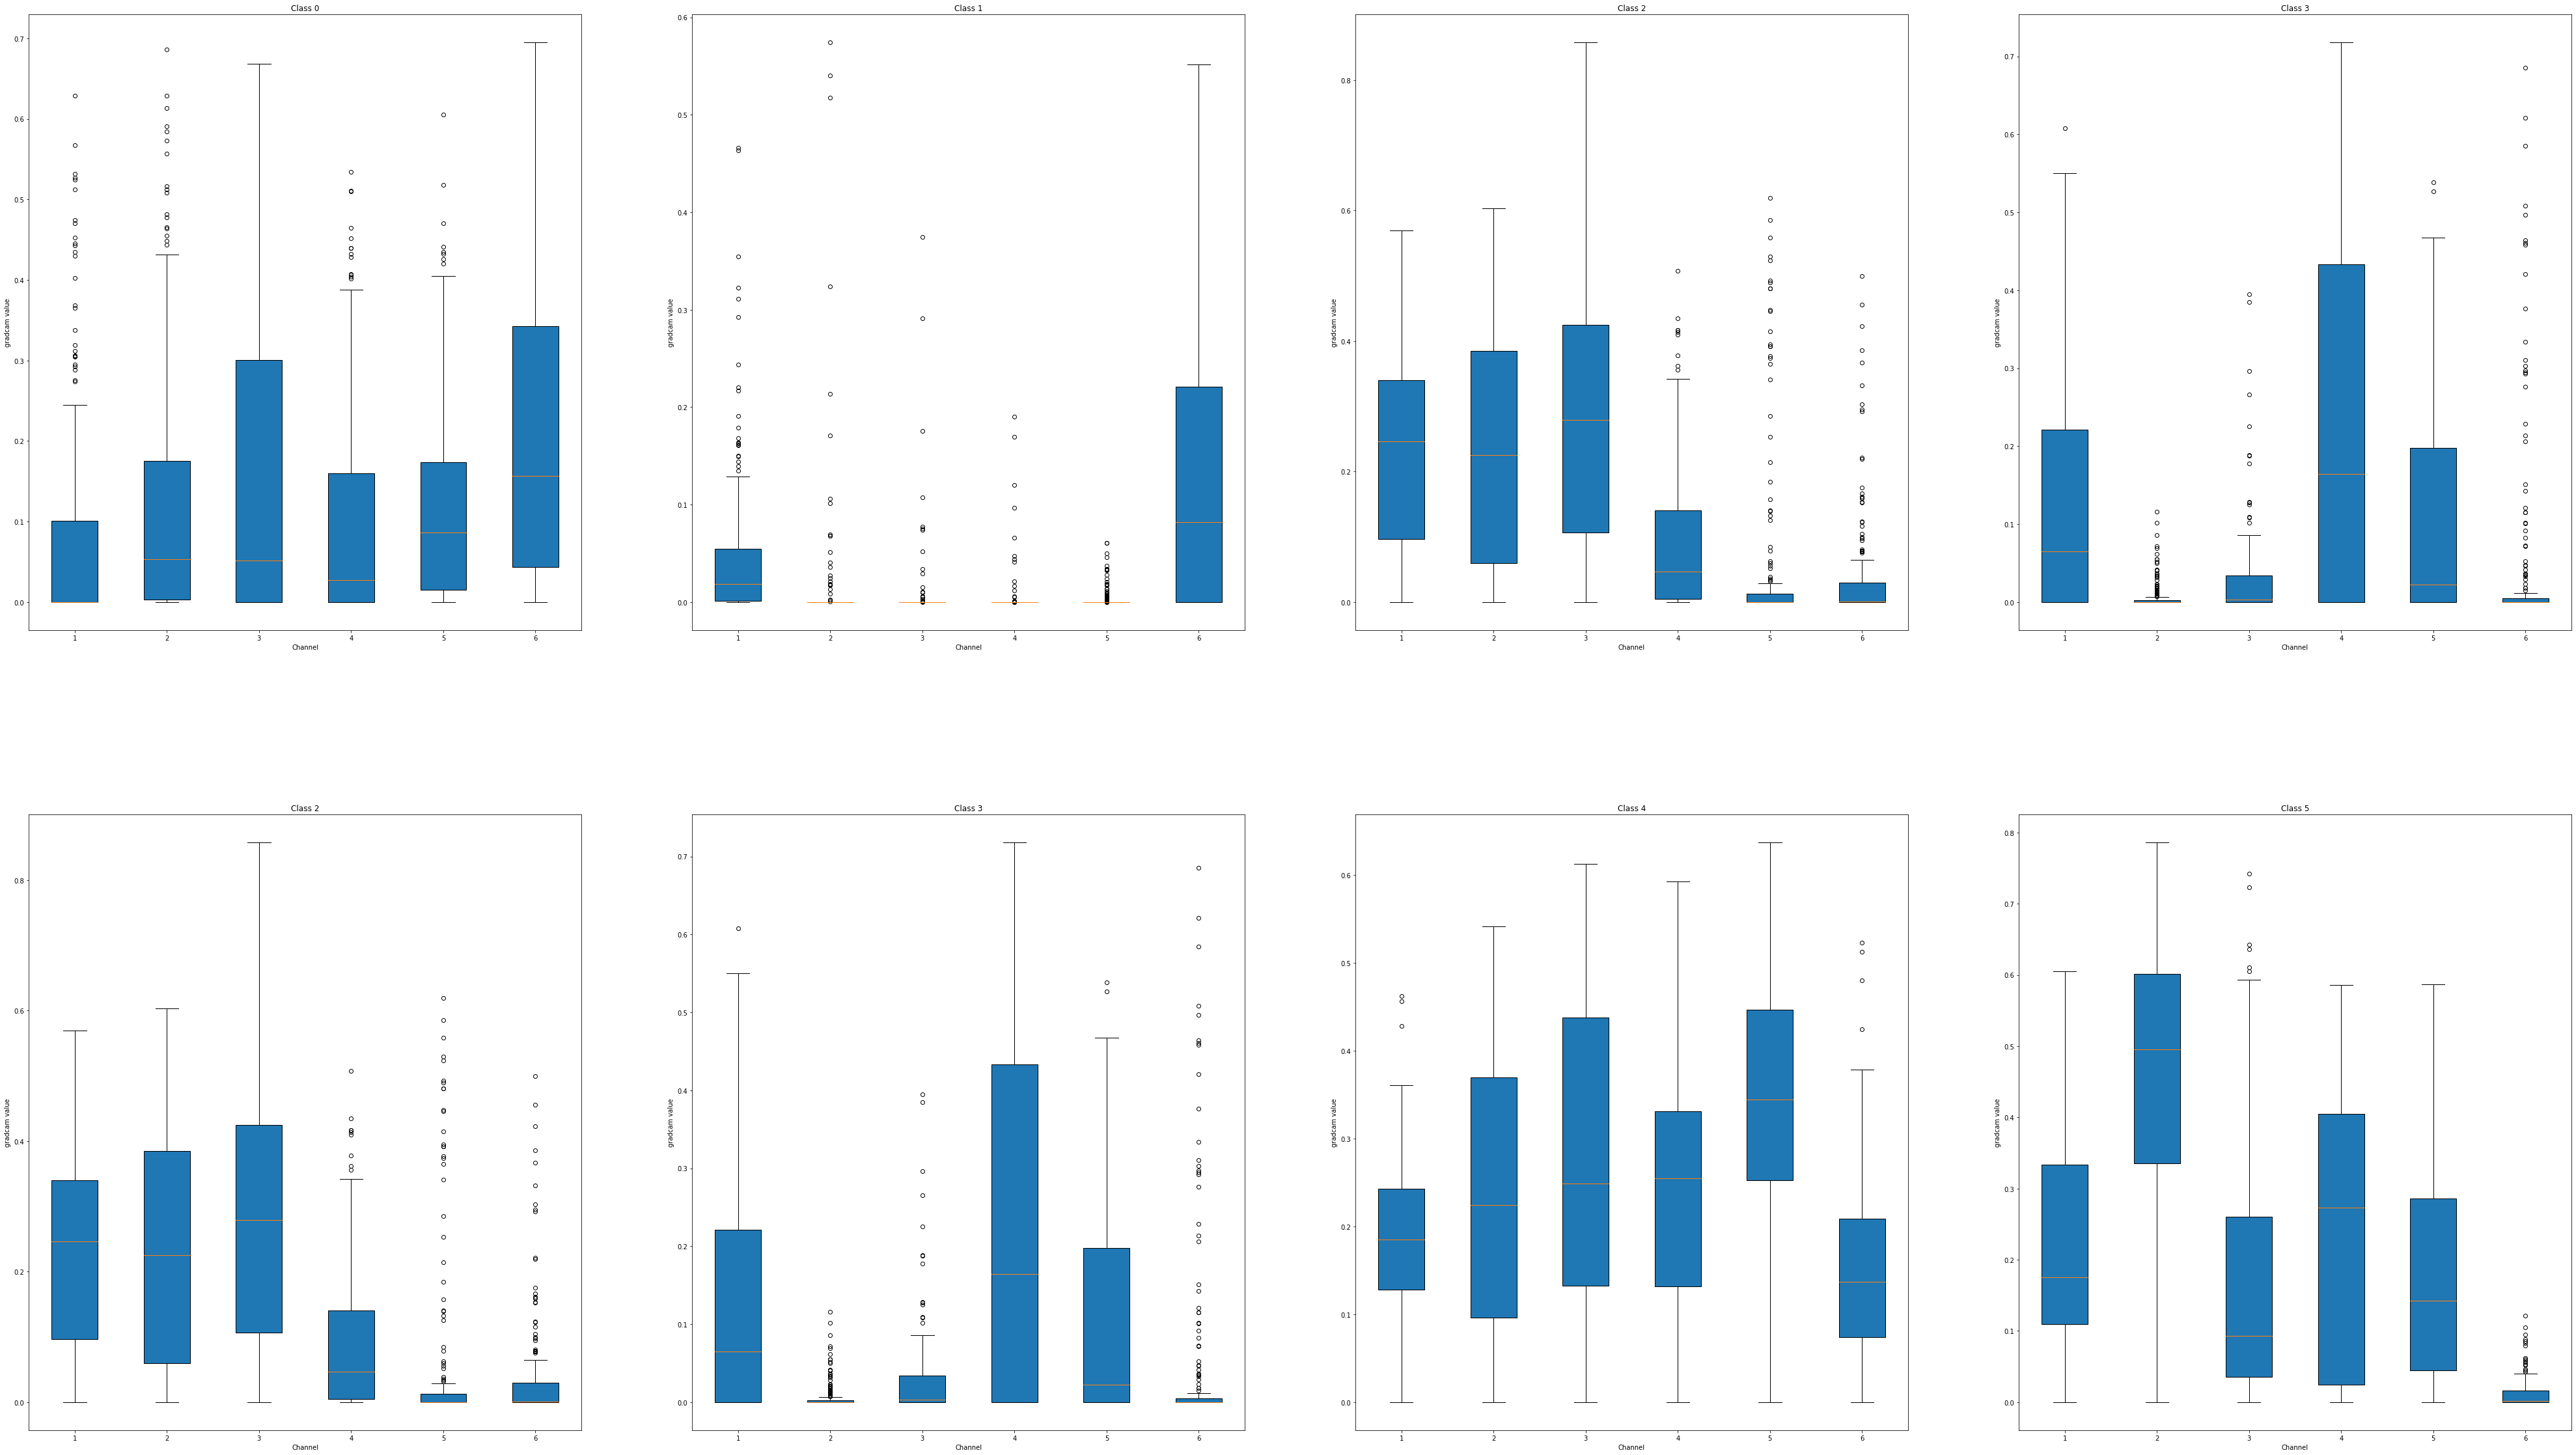

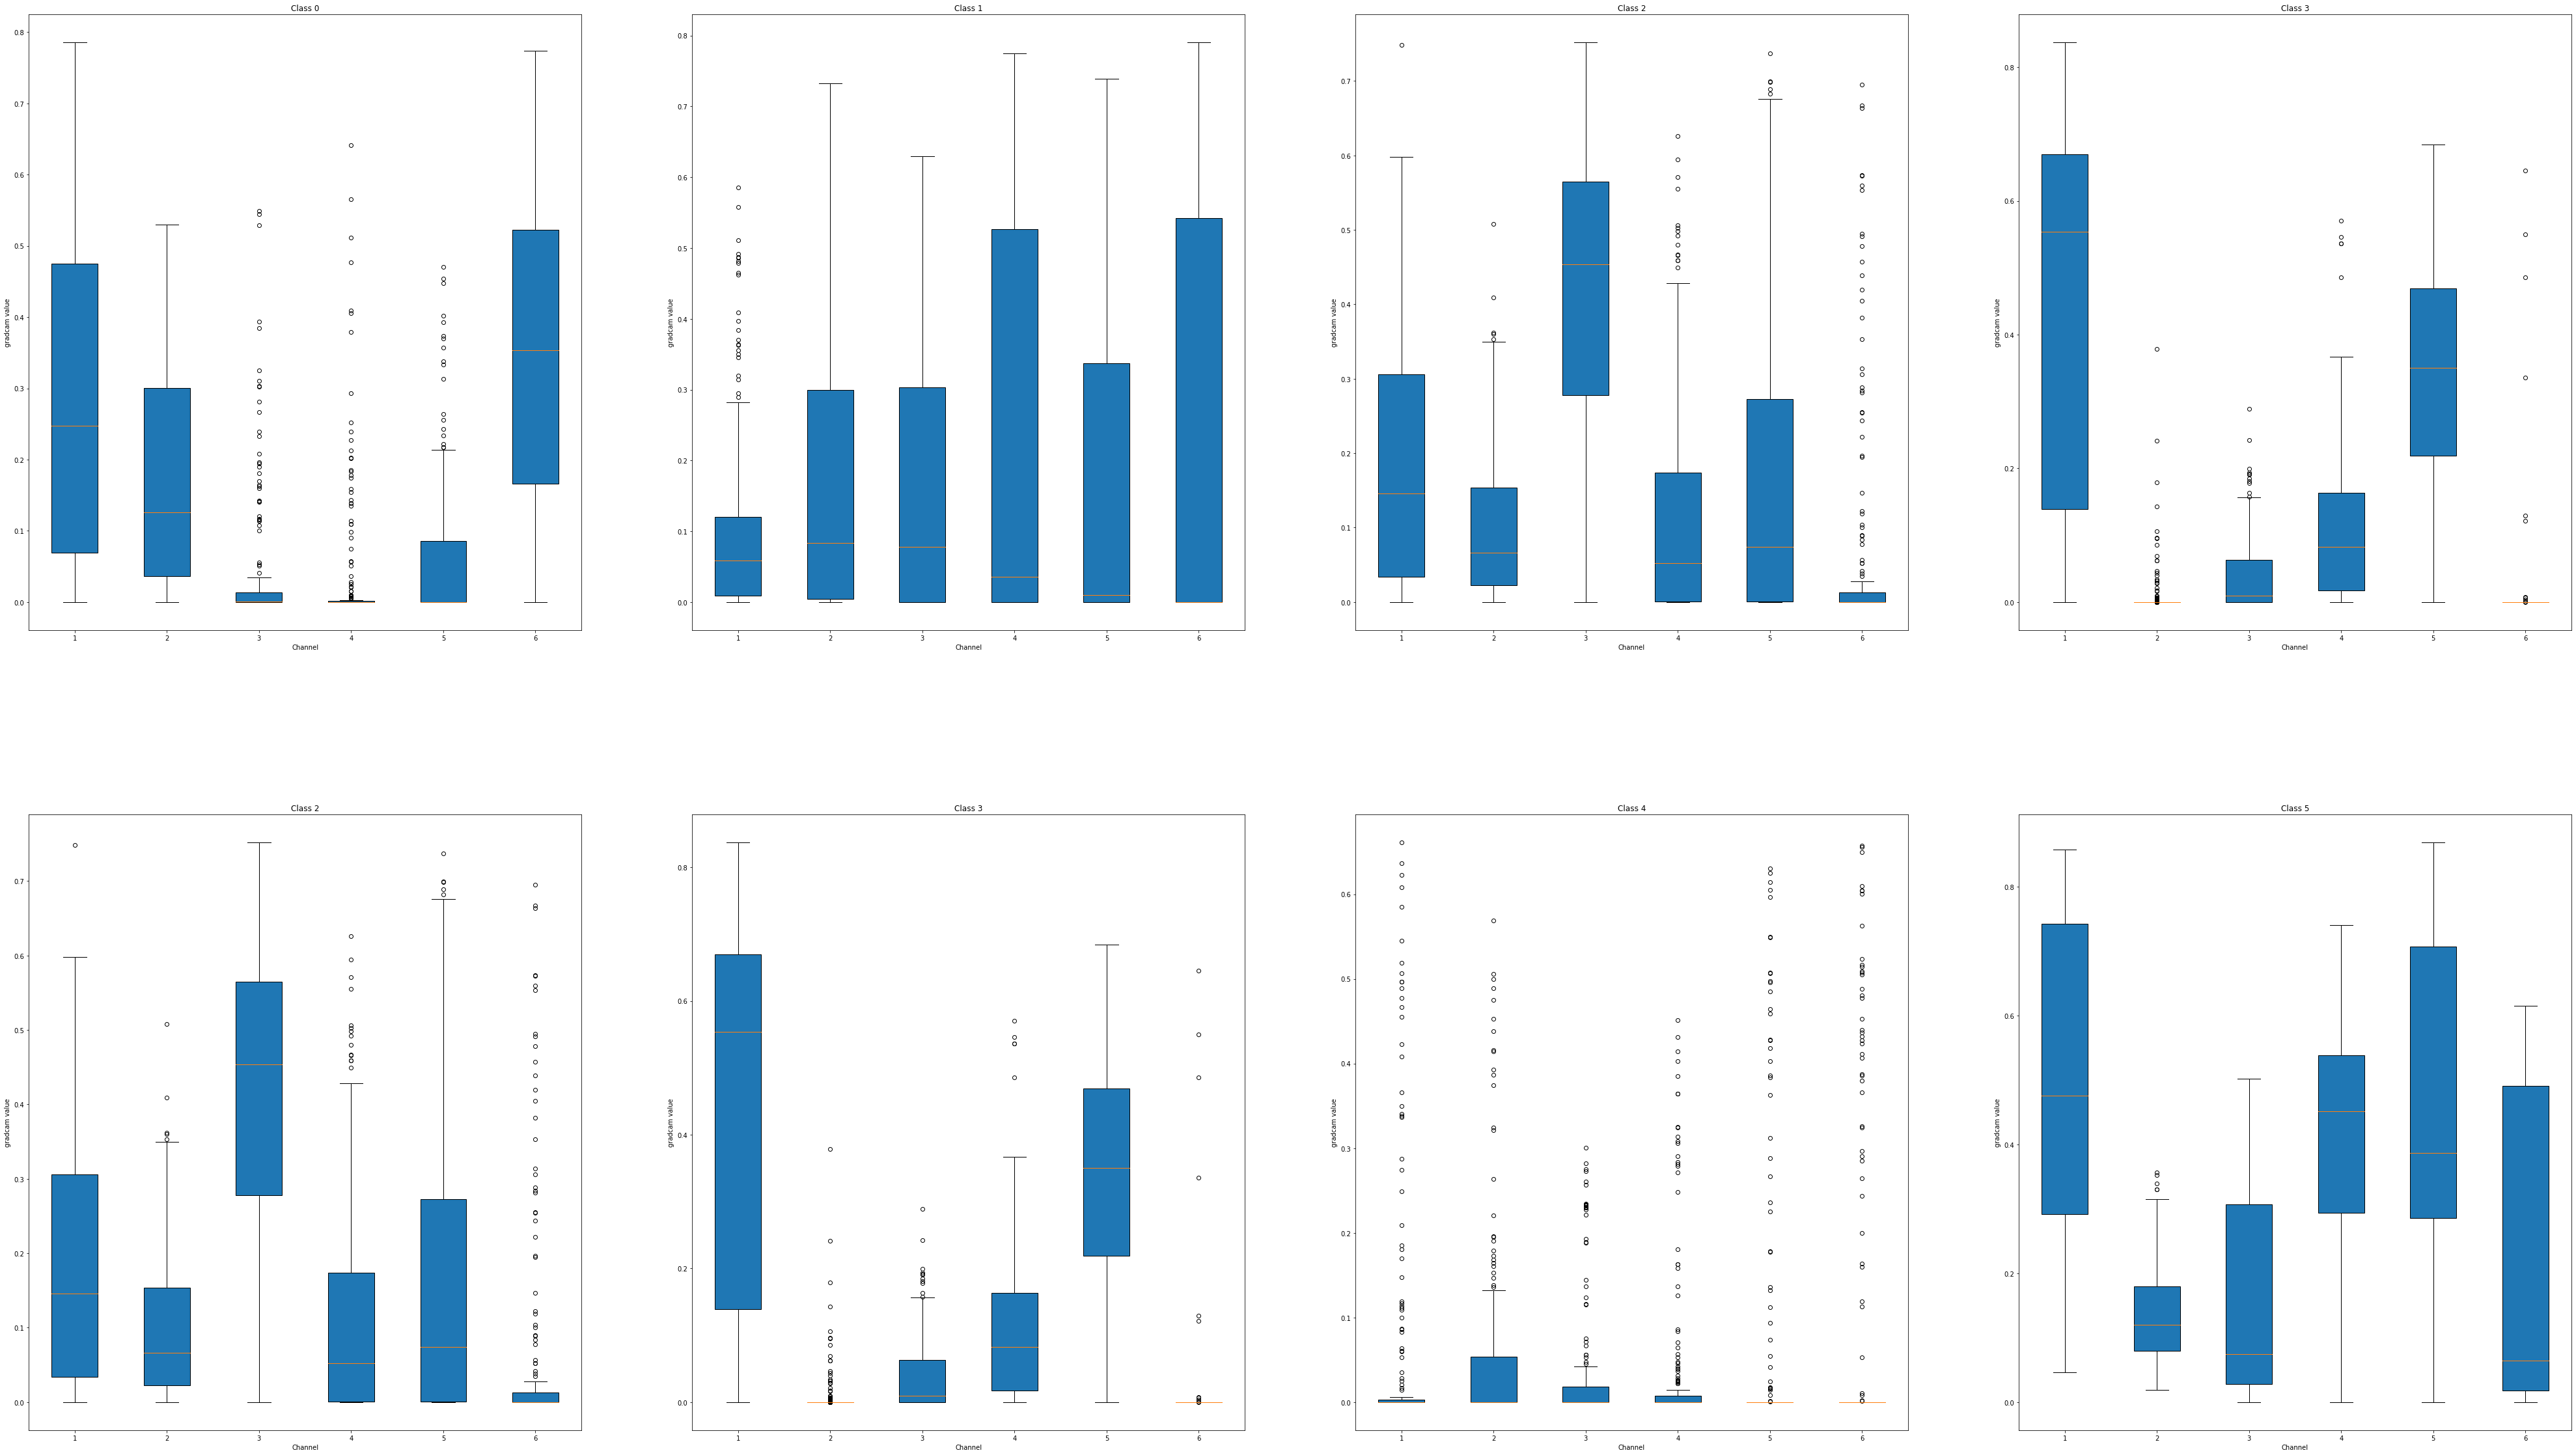

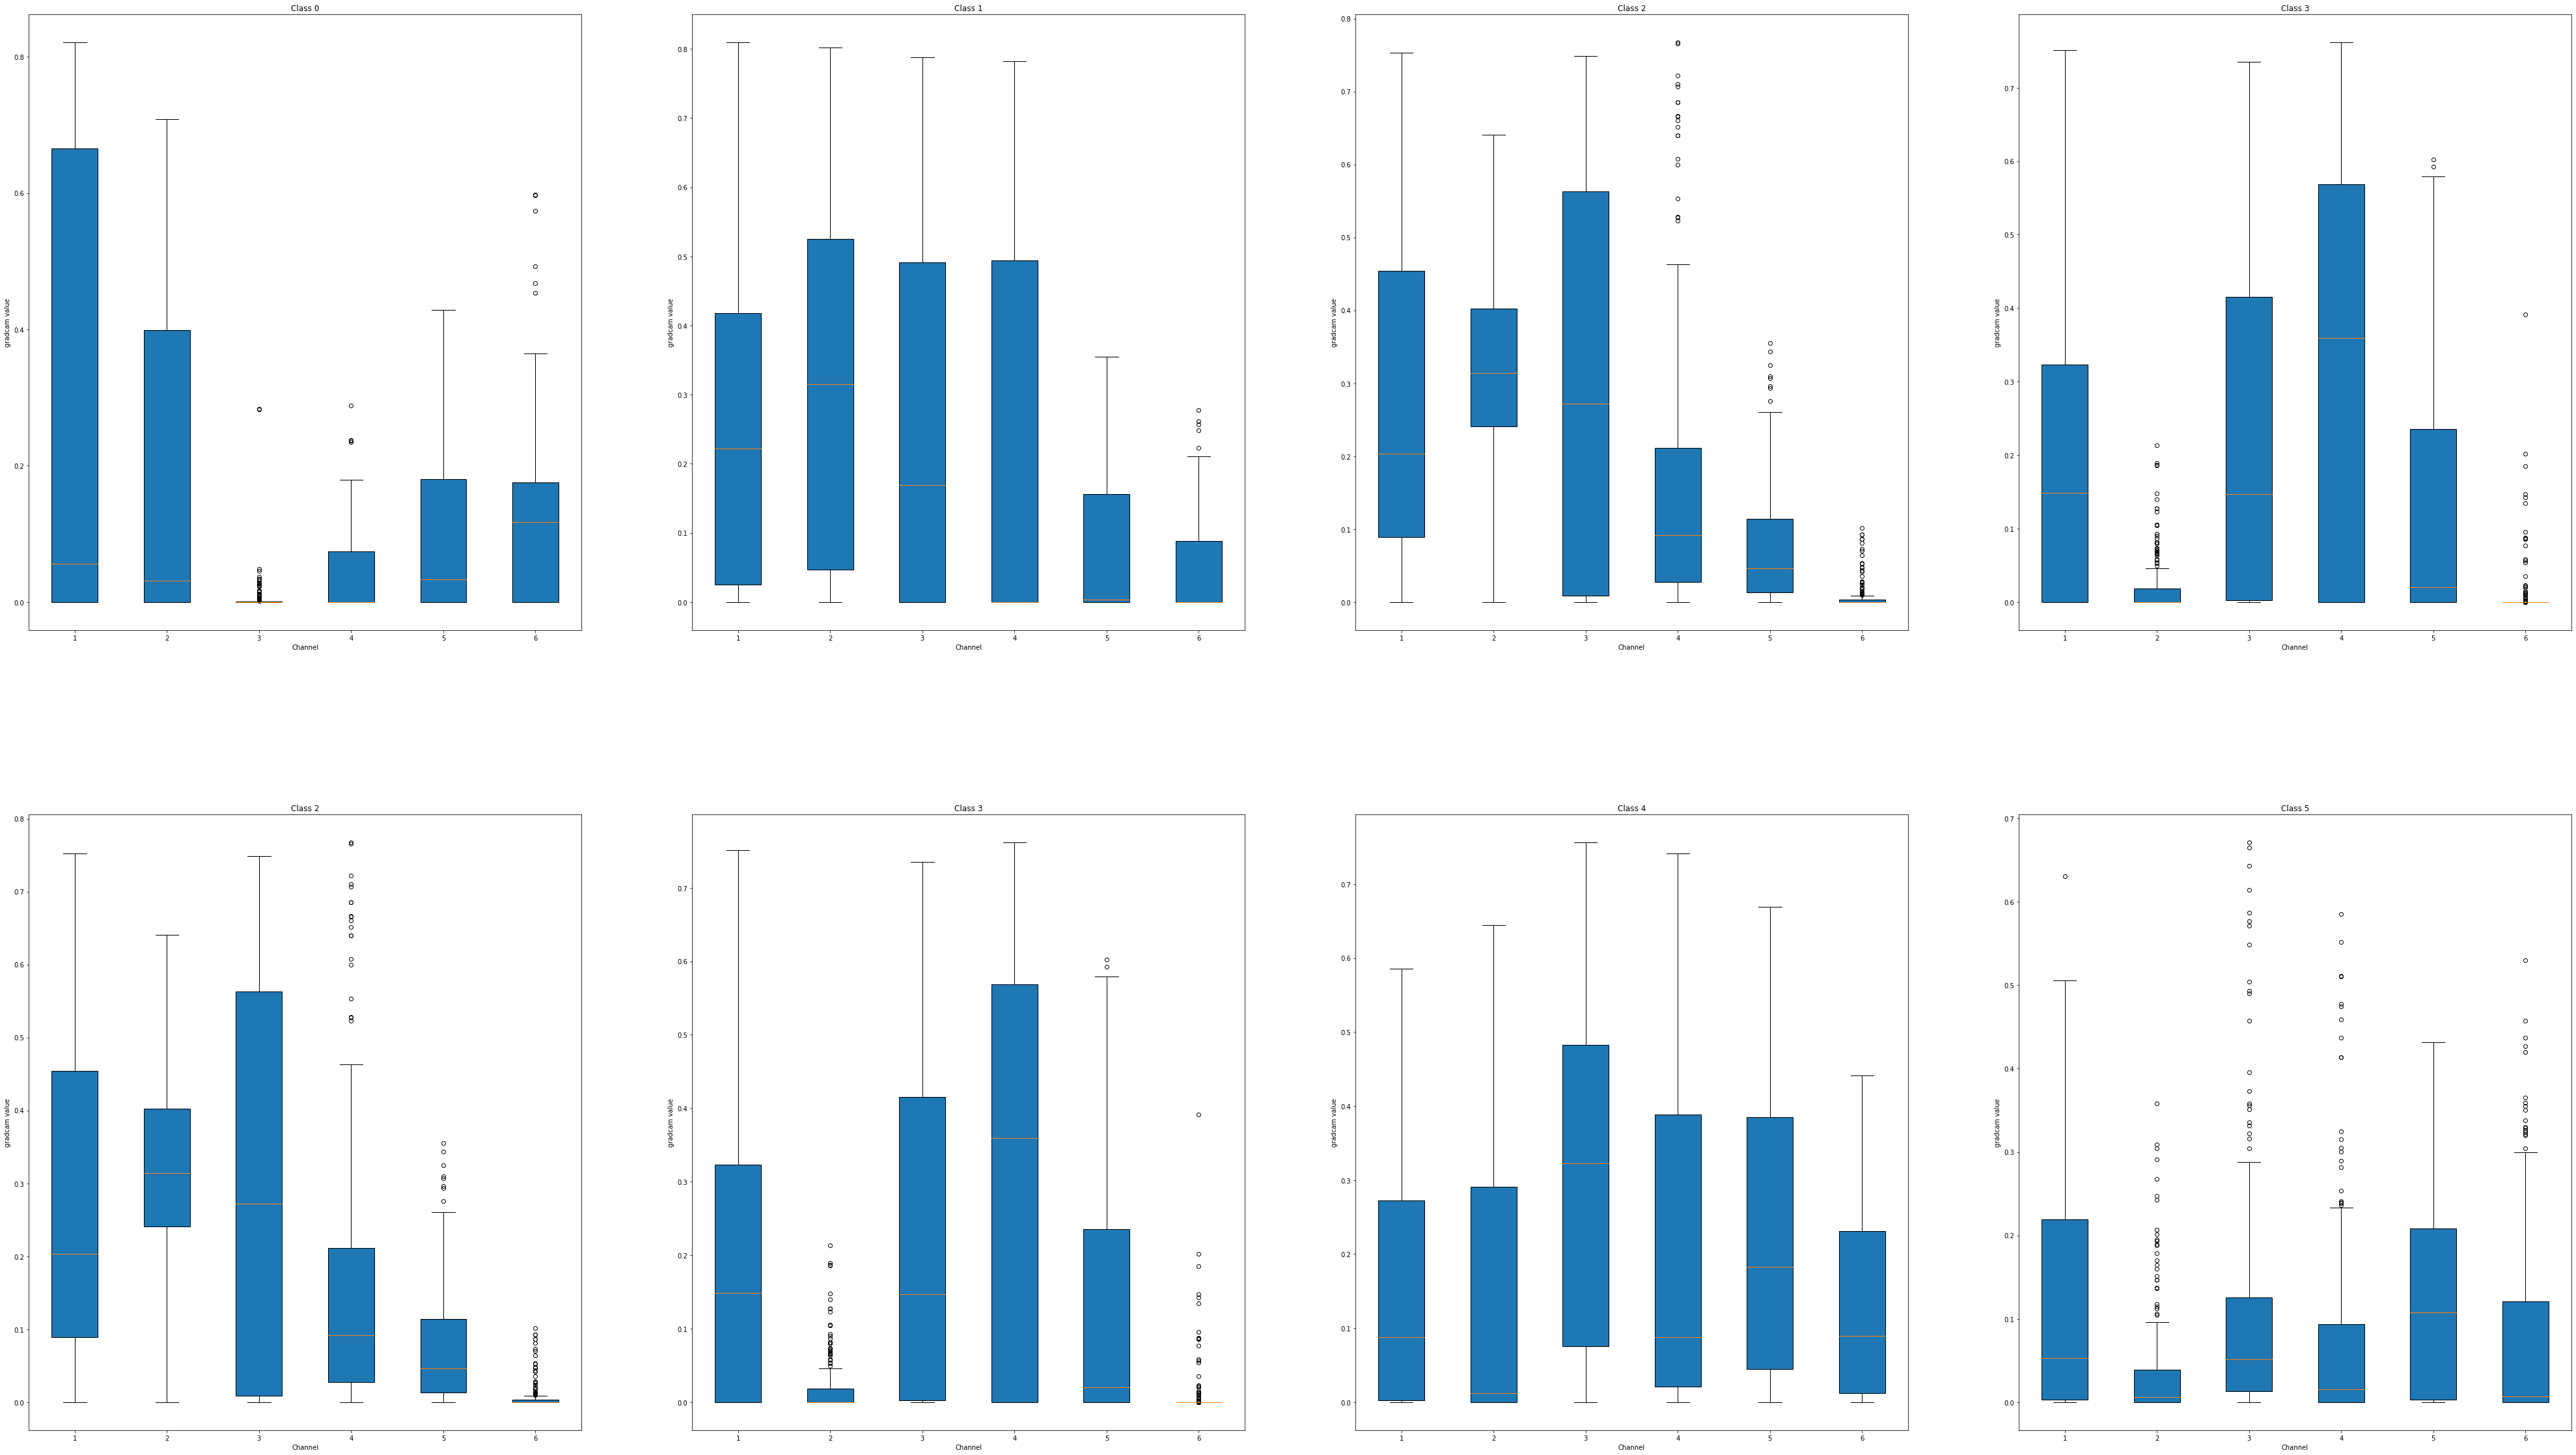

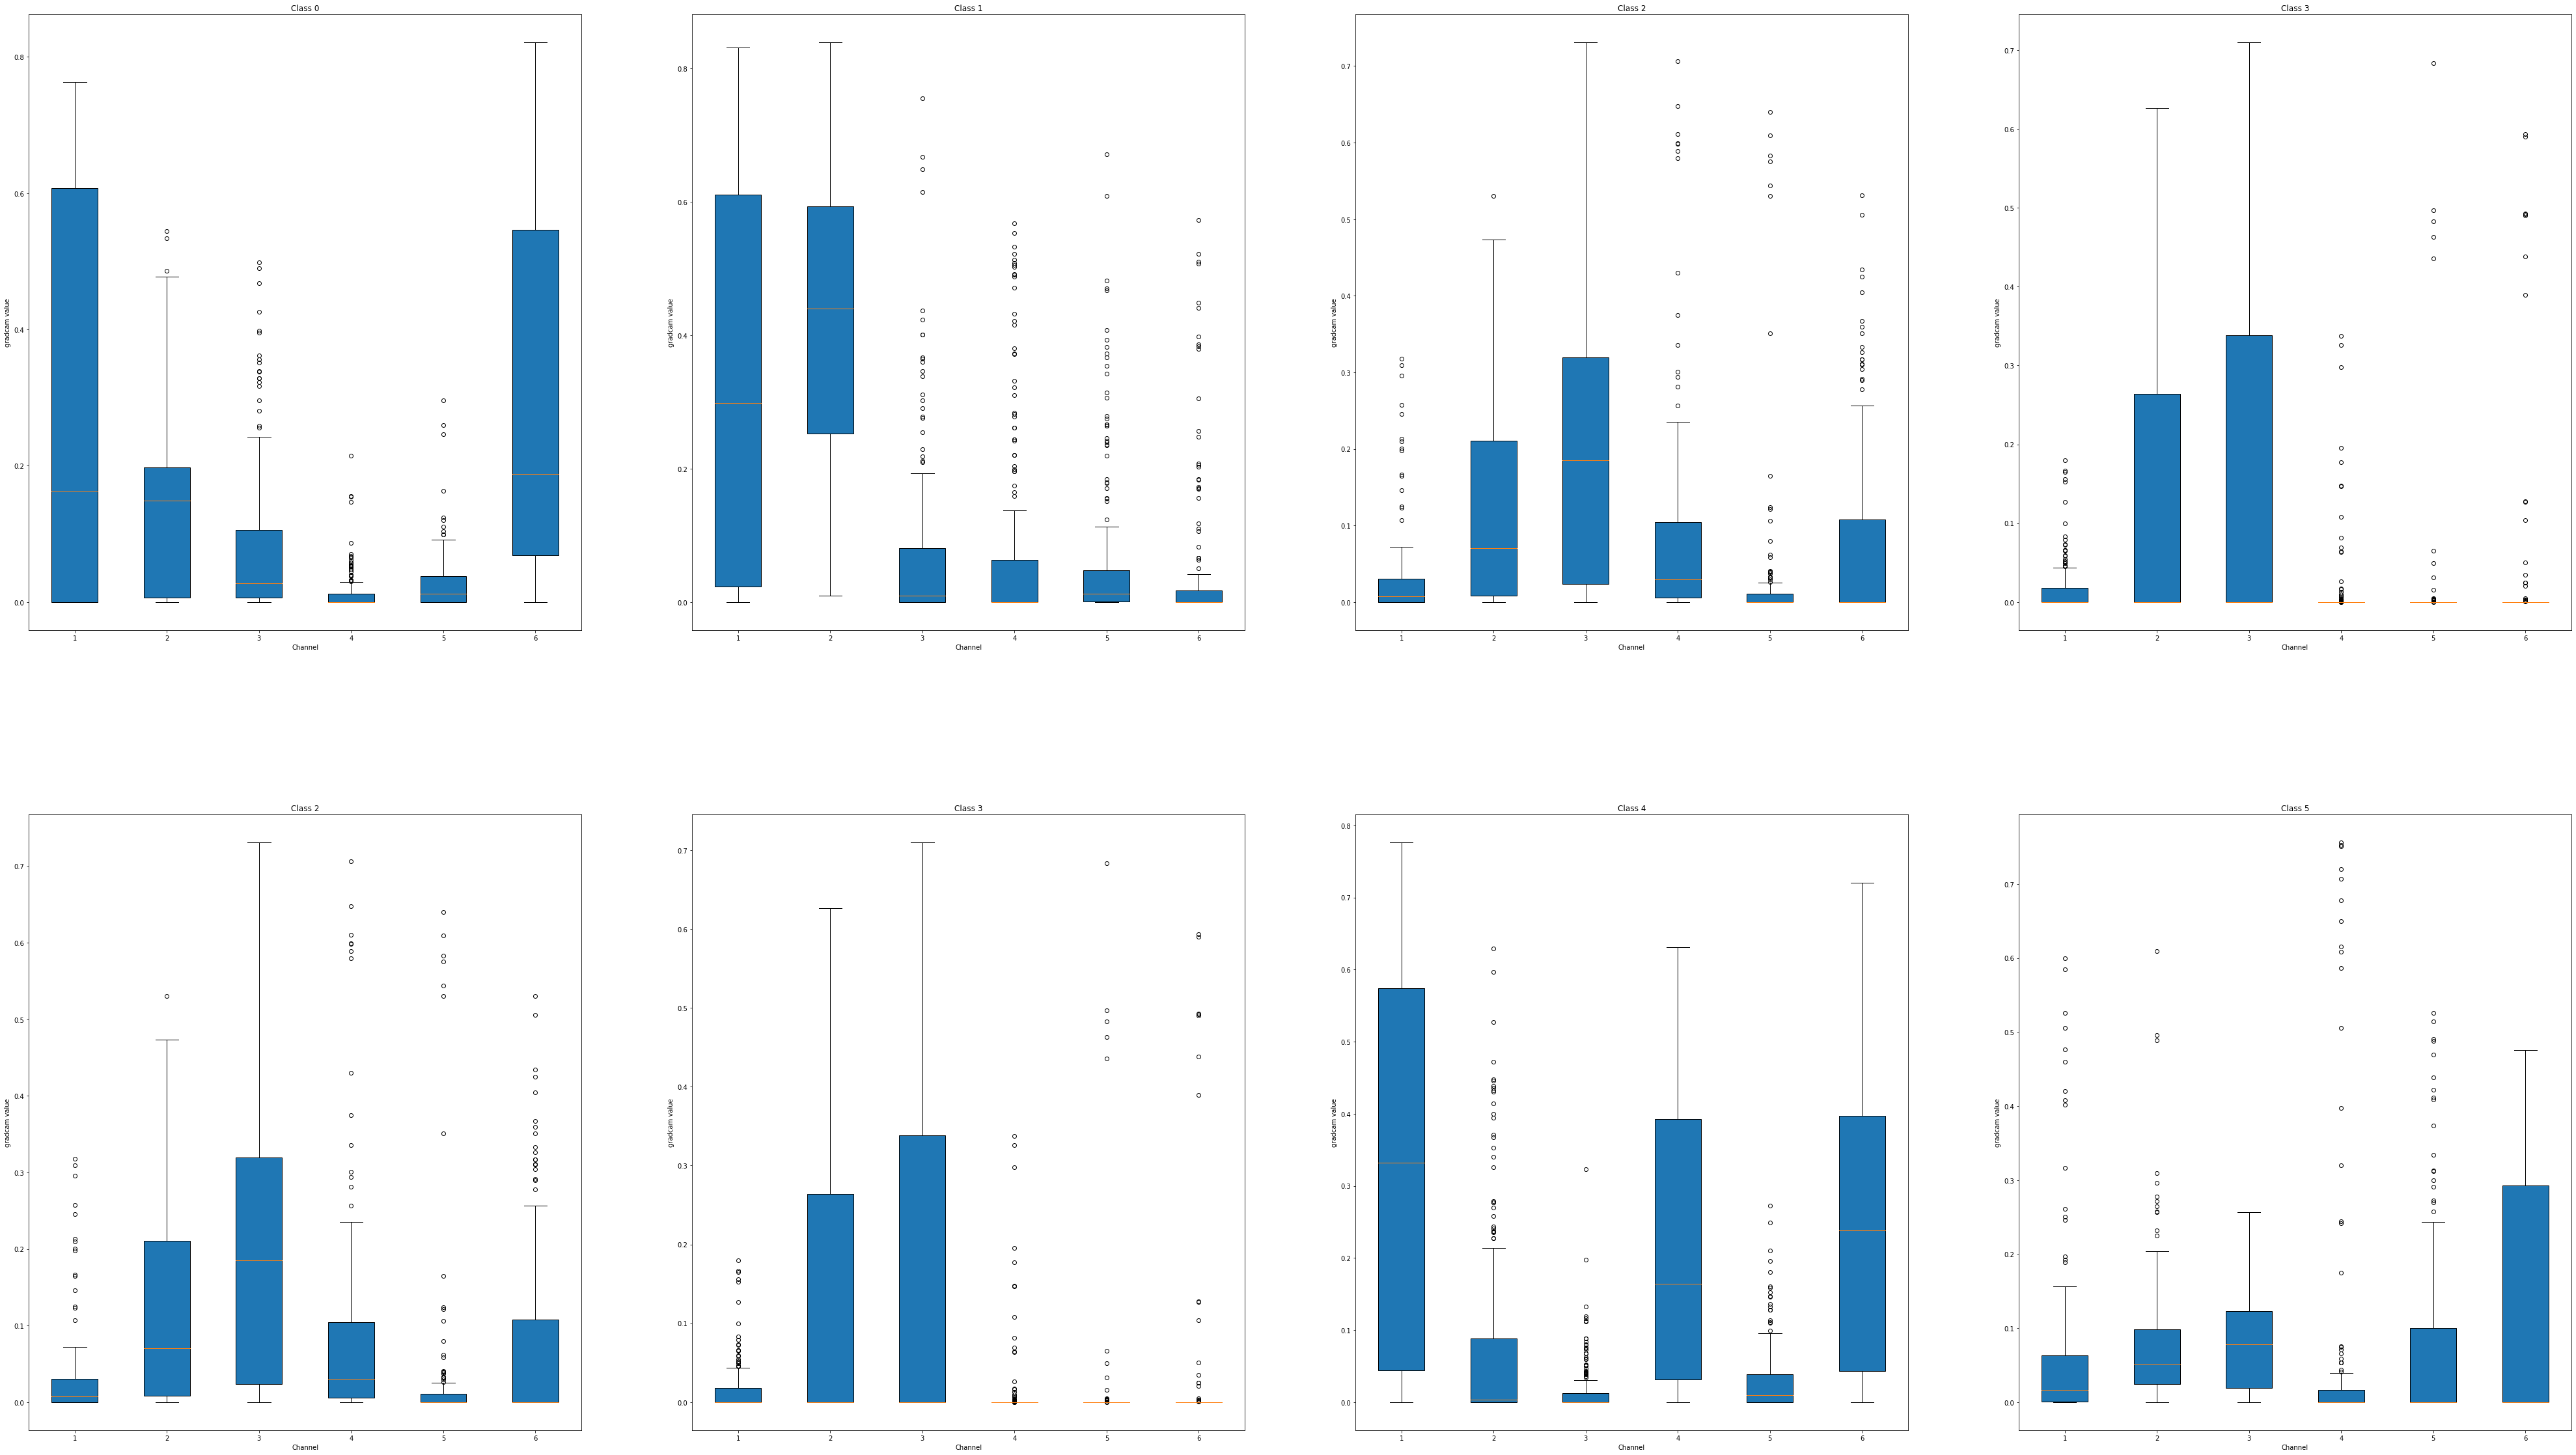

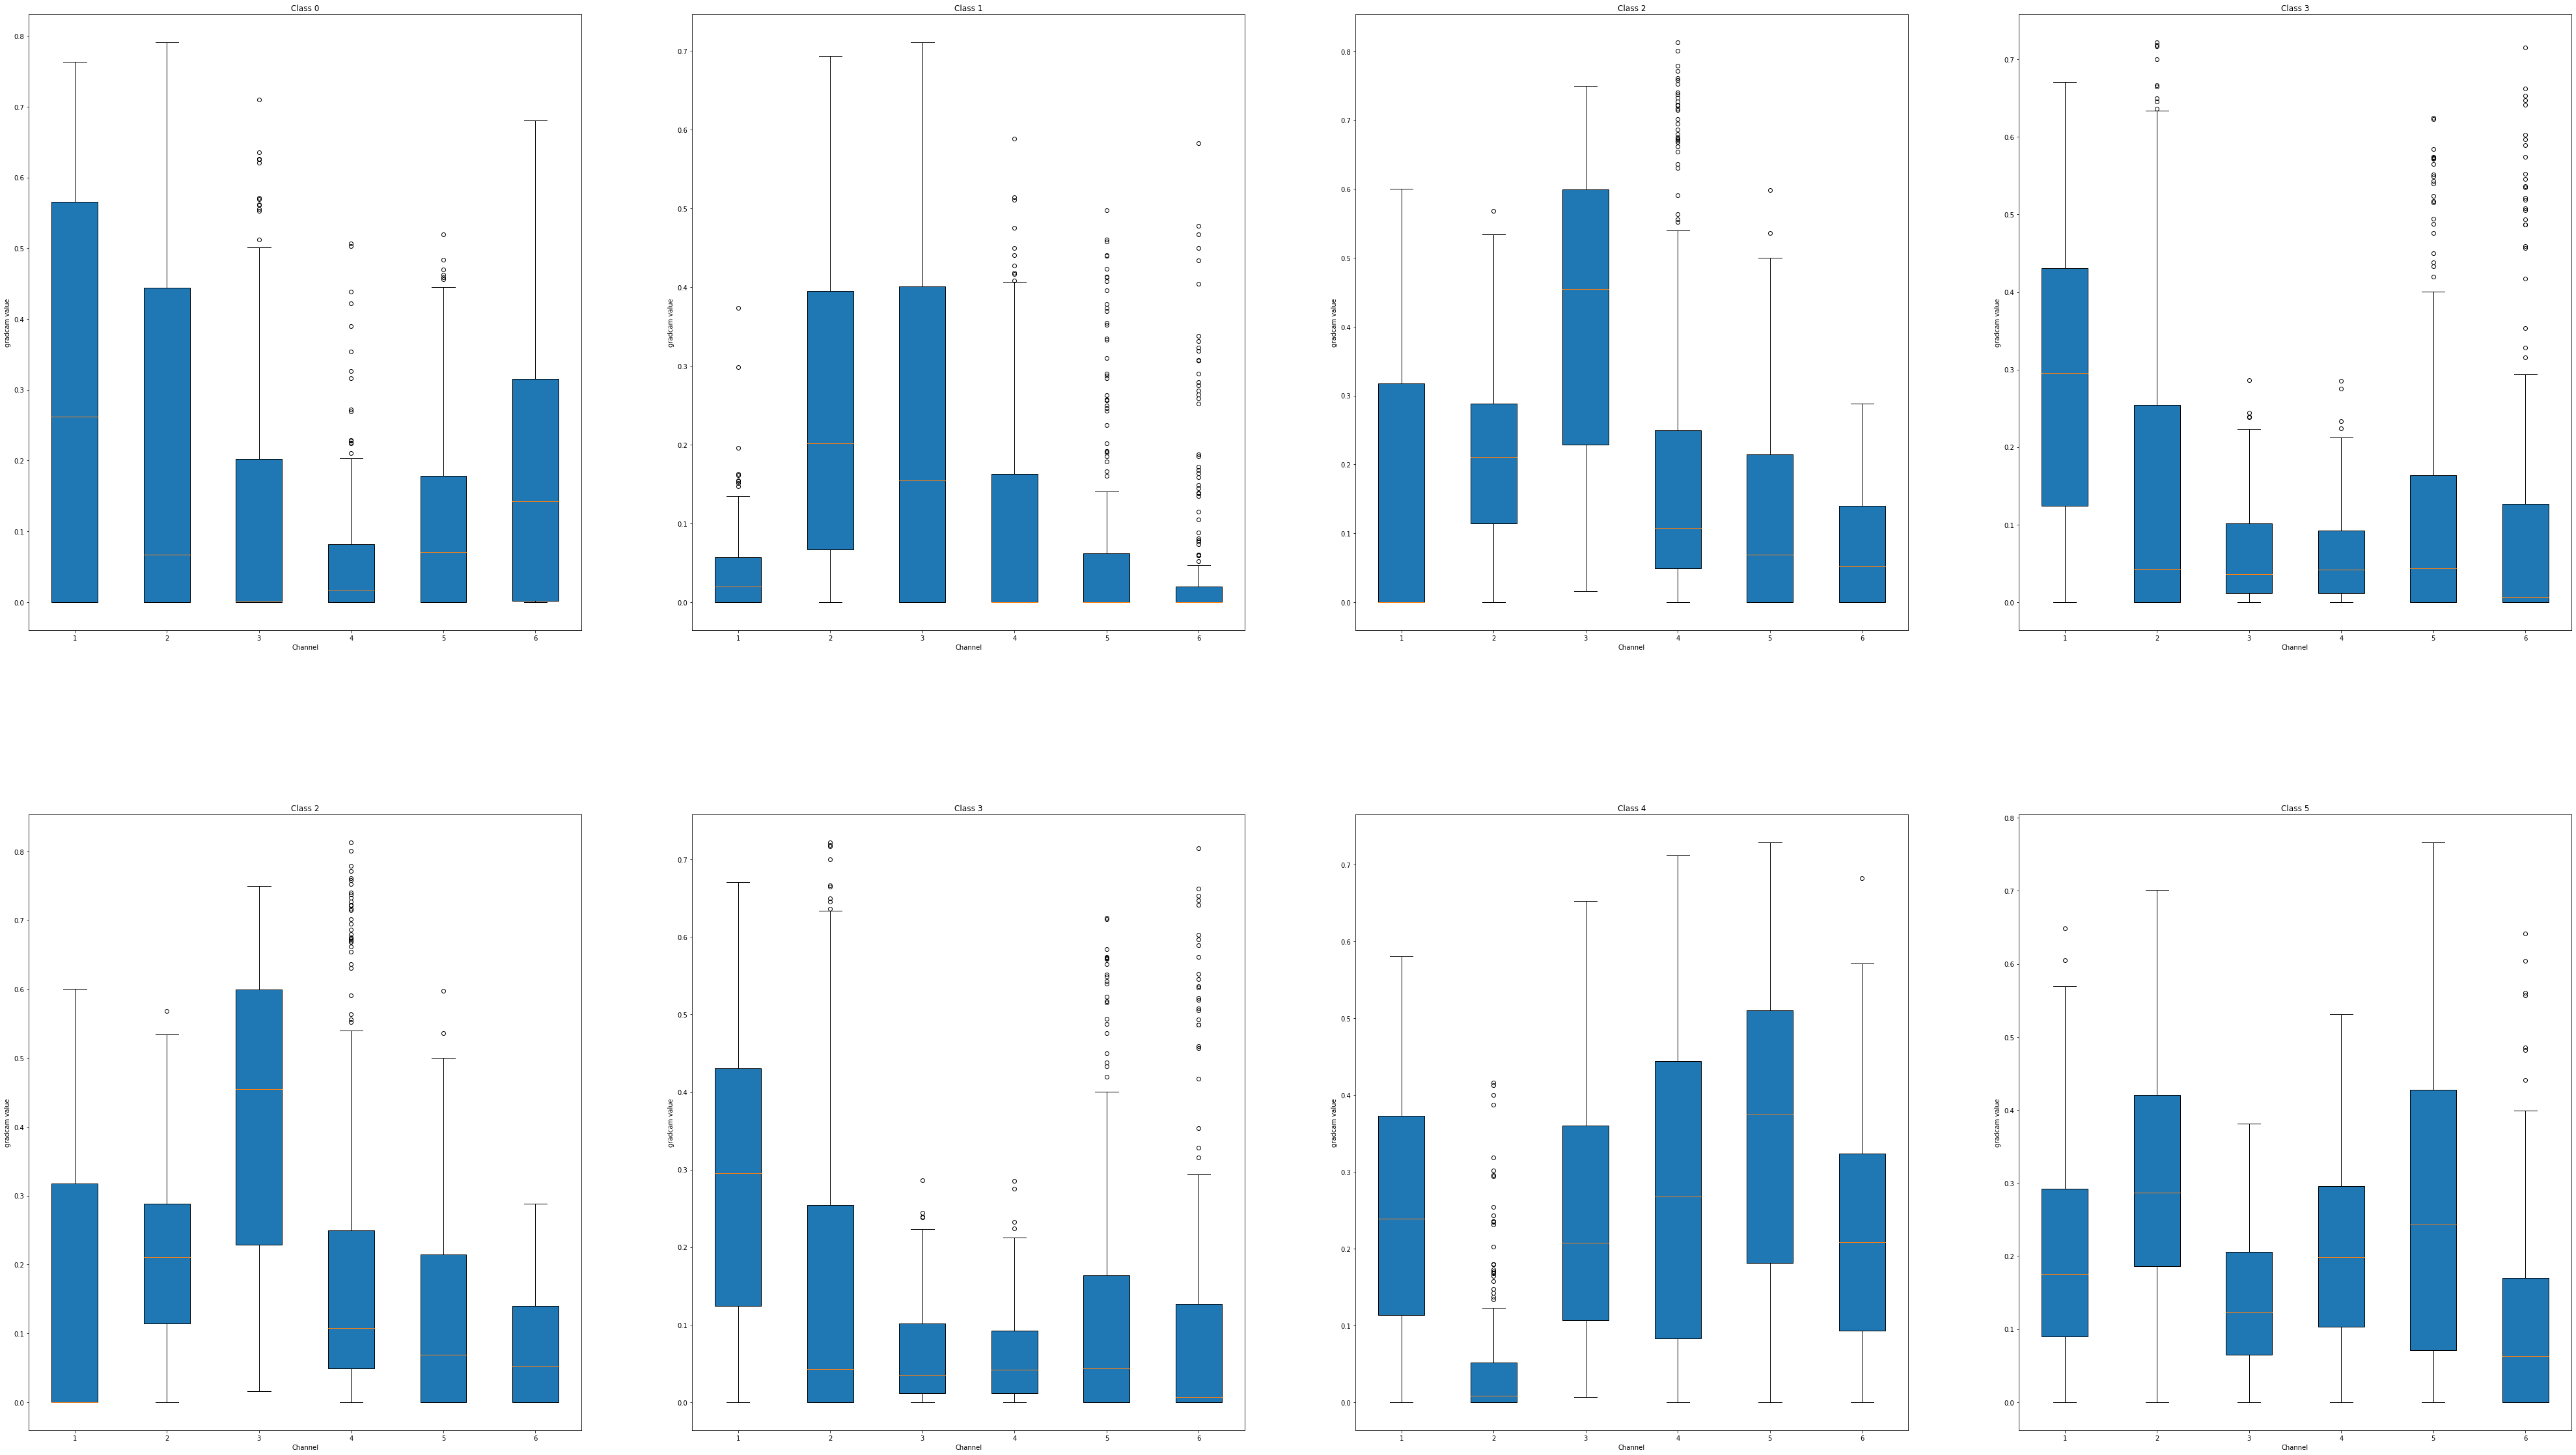

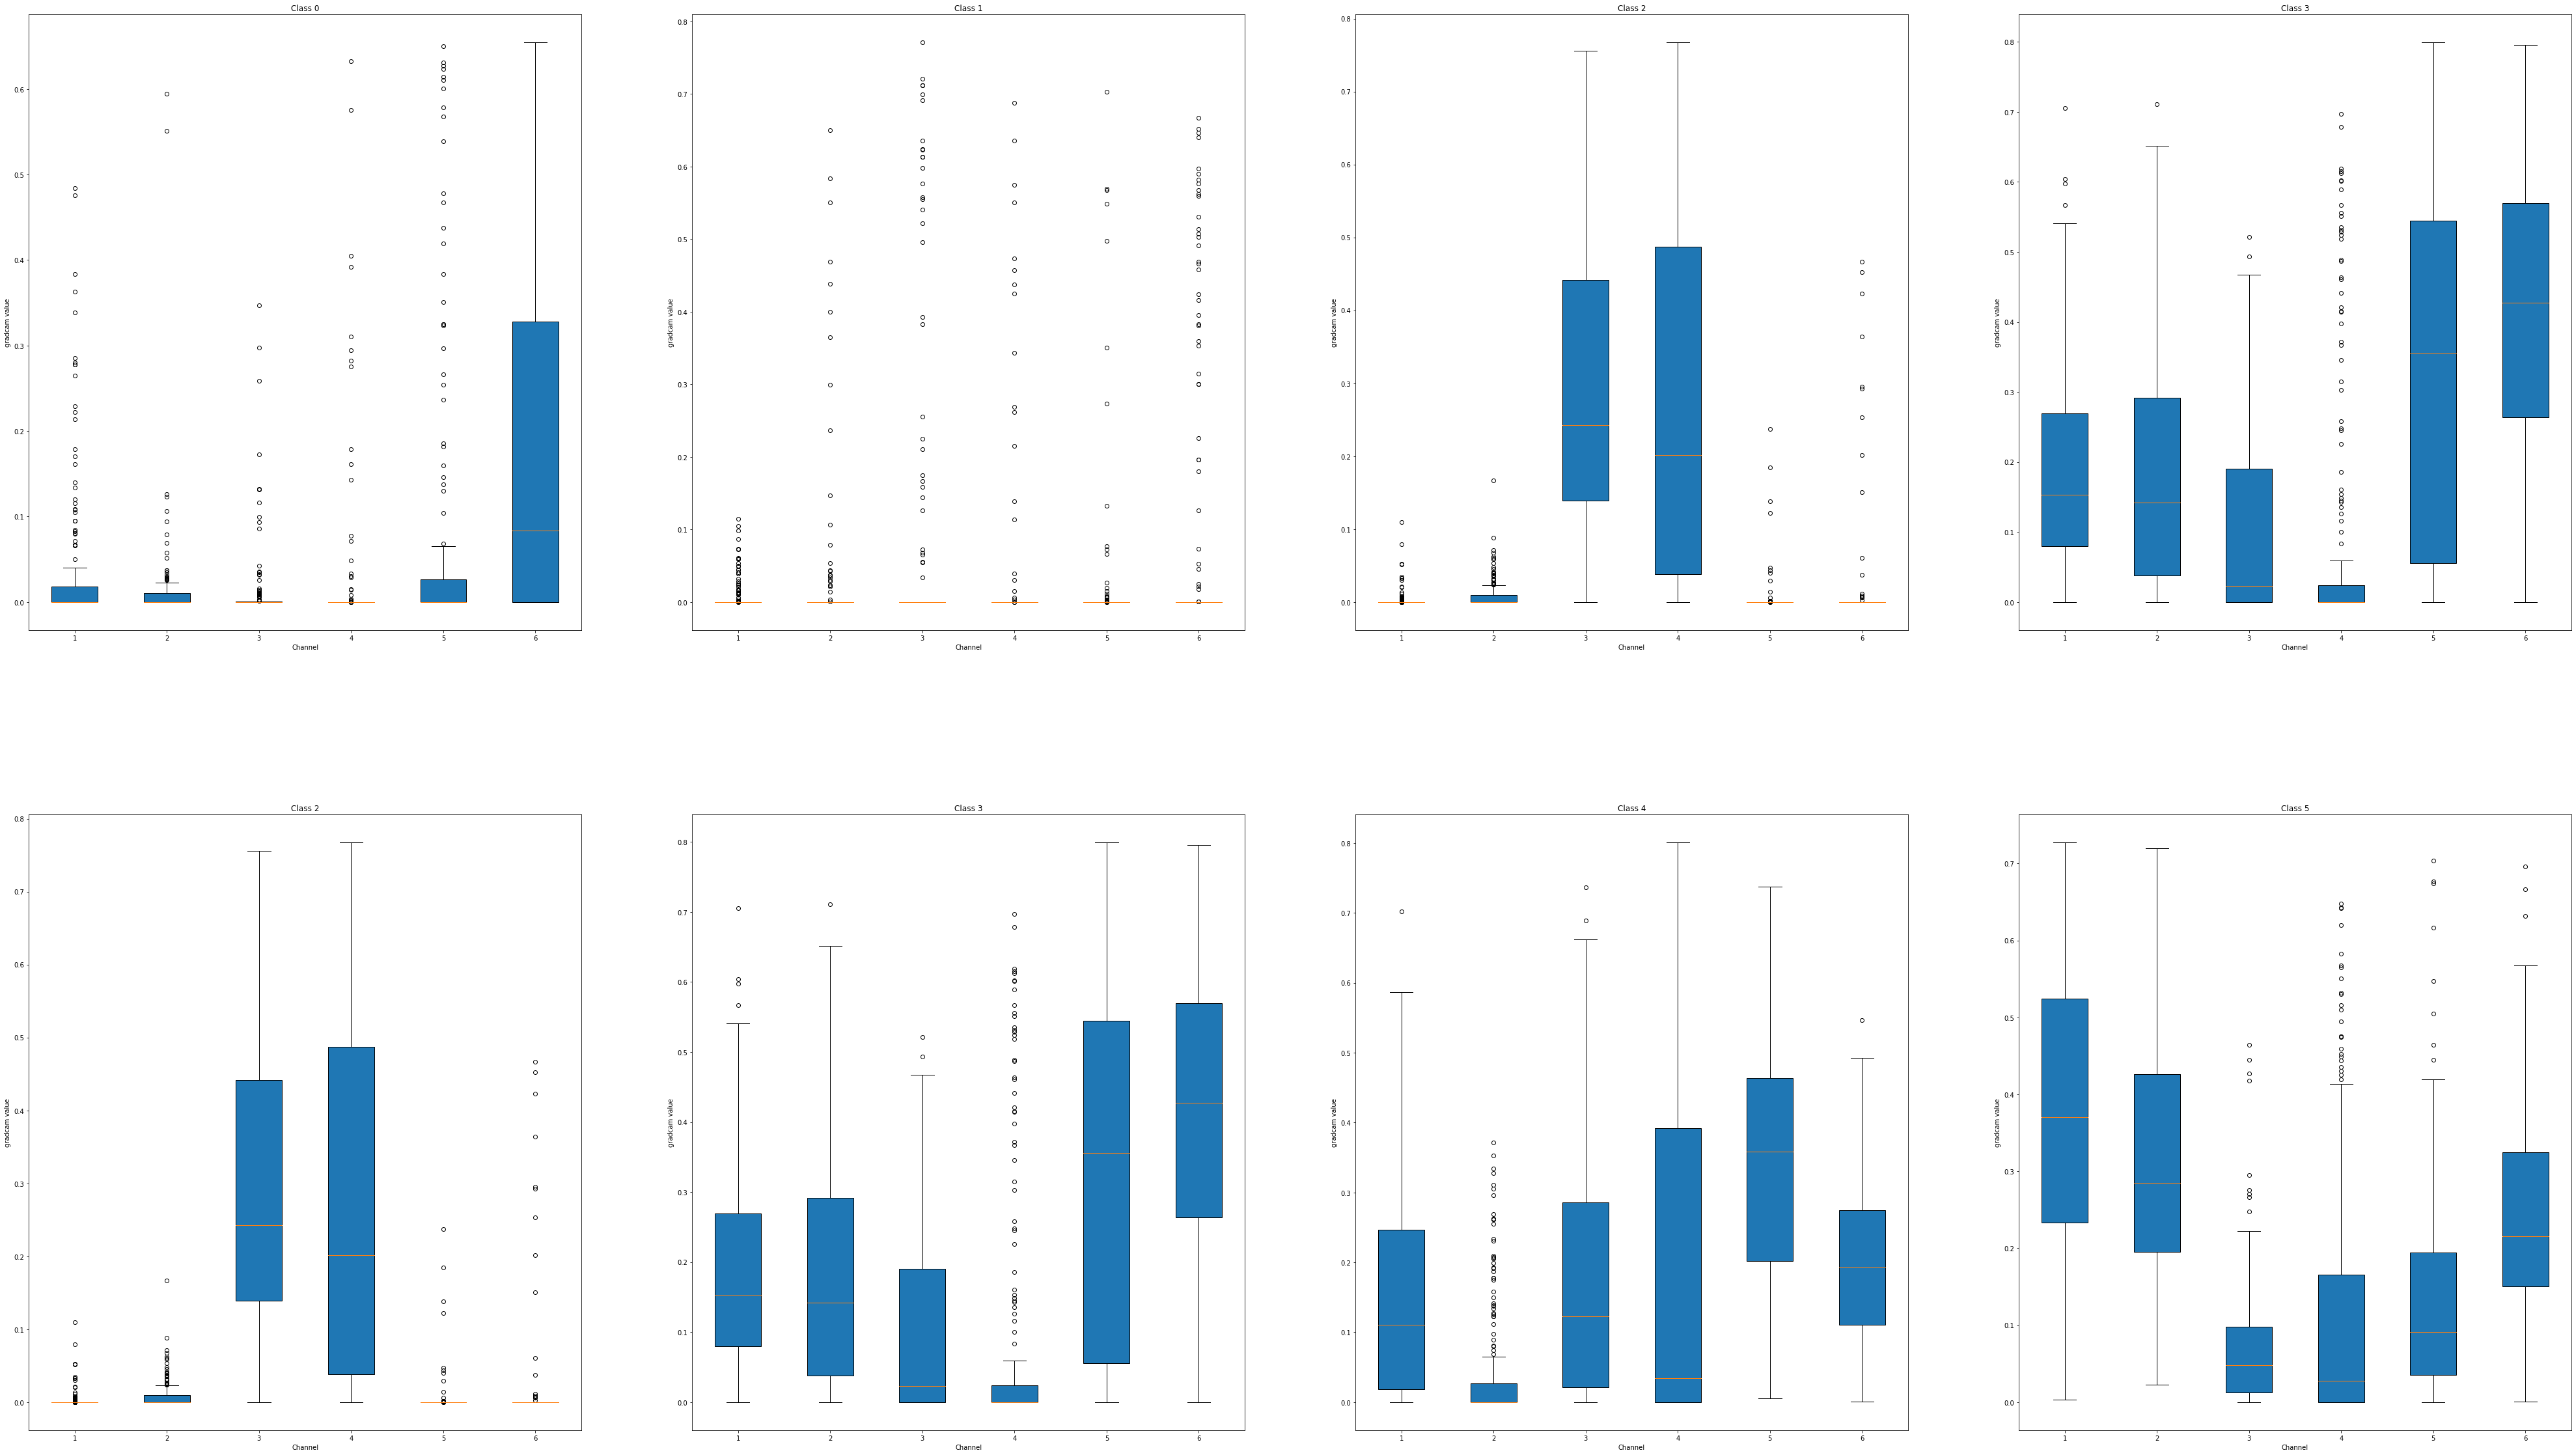

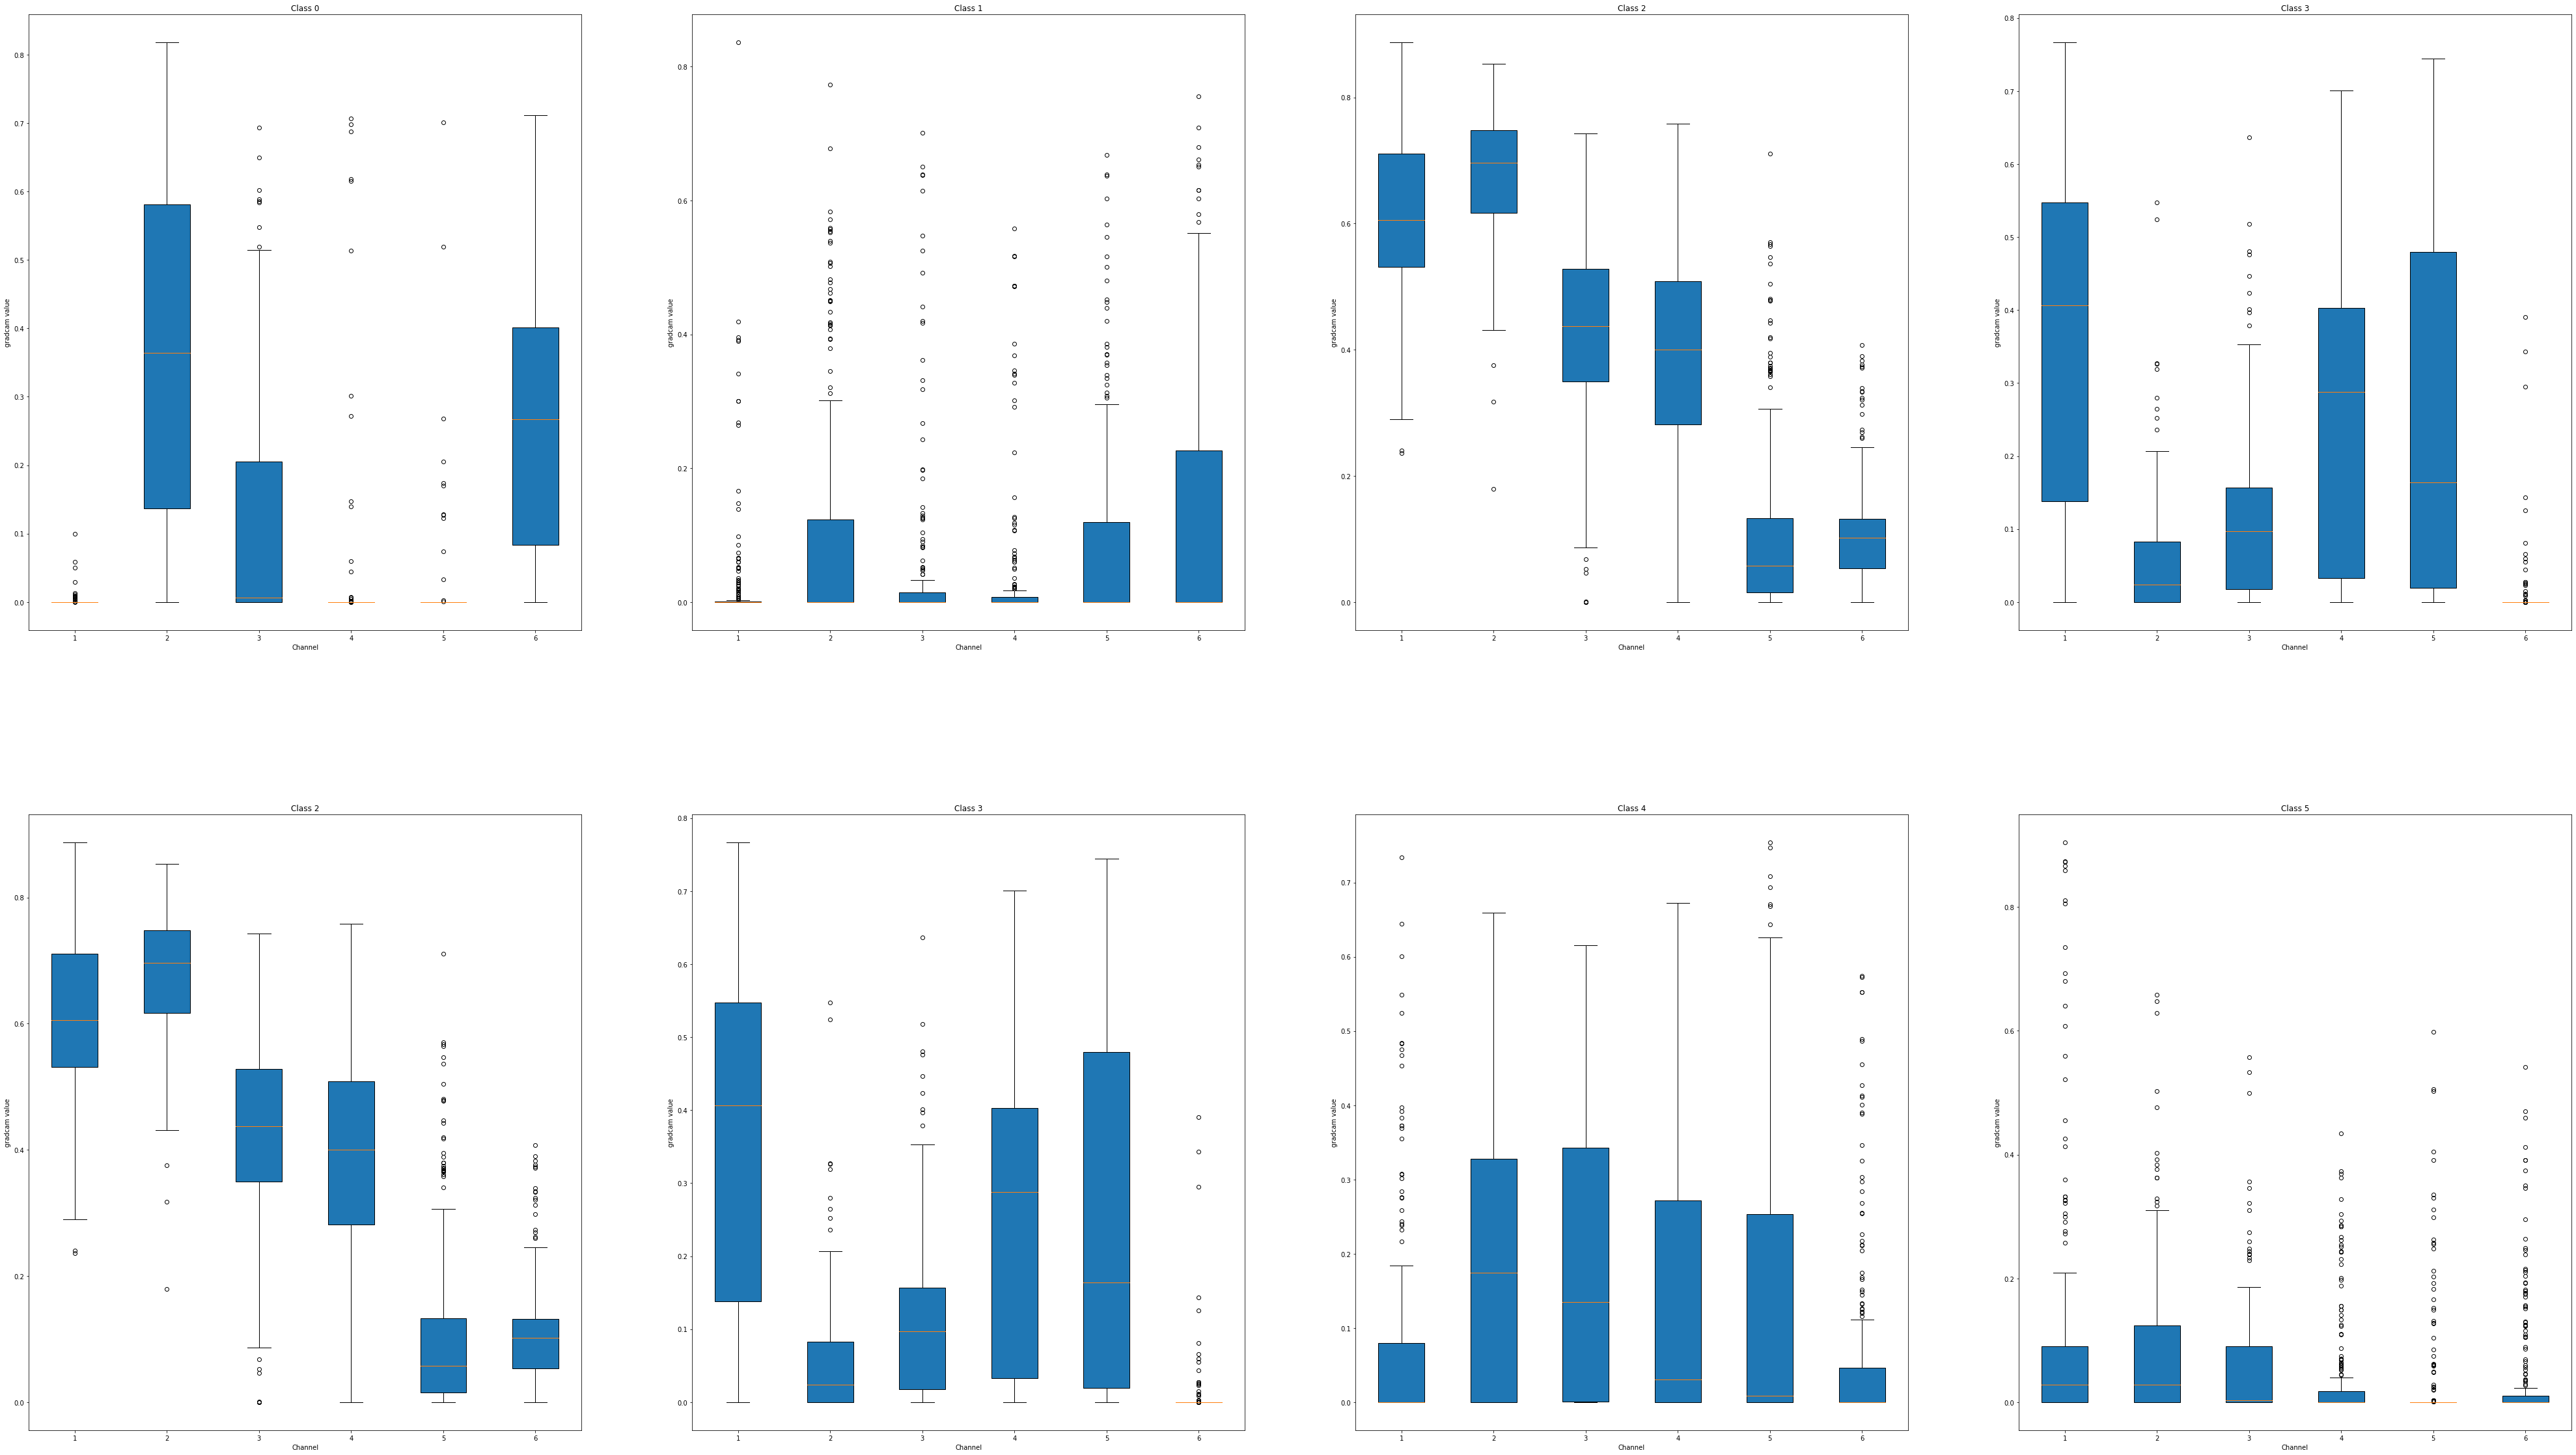

In [16]:
num_pat=11
for patient in range(11):  
    path = root_path + "/resources/Grad-CAM method 2/6 channels conv5/gradcam_results_patient{}_conv_2D_6channels_conv5.pkl".format(patient)
    with open(path, 'rb') as f:
        gradcam = pickle.load(f)
    saved_model = load_model(root_path + '/resources/new_models/conv5/Conv2D_6channels_pat_{}_nodense.h5'.format(patient),
                             custom_objects={'RReLU': RReLU})
    classes = 8
    for cls in range(classes):
        for index in range(gradcam[cls]["gradcam_values"].shape[0]):
            maximum_gd=gradcam[cls]["gradcam_values"][index].max()
            #print(maximum_gd)
            if maximum_gd!=0:
                gradcam[cls]["gradcam_values"][index]=gradcam[cls]["gradcam_values"][index]/maximum_gd
    mean_val=[]        
                
    for cls in range(classes):
        #maximum_gd=gradcam[cls]["gradcam_values"].max()
        #mean_val.append(np.average((gradcam[cls]["gradcam_values"]/maximum_gd), axis=2))
        mean_val.append(np.average((gradcam[cls]["gradcam_values"]), axis=2))
    print((mean_val[2].shape))
    heigth=2;
    width=4;
    f, axes = plt.subplots(heigth, width,figsize=(70, 40))
    f.subplots_adjust(hspace=0.3, wspace=0.2)
    #lst=[0,2,4,6]
    #lst=[0,3,6]
    lst=[0,2]
    for i, num in enumerate(lst):
        axes[i,0].boxplot(mean_val[num], patch_artist=True)
        axes[i,0].set(xlabel="Channel", ylabel="gradcam value")
        axes[i,0].set(title="Class {}".format(num))
        #axes[i,0].set_ylim(-0.000001, 0.00025)
        axes[i,1].boxplot(mean_val[num+1], patch_artist=True)
        axes[i,1].set(xlabel="Channel", ylabel="gradcam value")
        axes[i,1].set(title="Class {}".format(num+1))
        axes[i,2].boxplot(mean_val[num+2], patch_artist=True)
        axes[i,2].set(xlabel="Channel", ylabel="gradcam value")
        axes[i,2].set(title="Class {}".format(num+2))
        axes[i,3].boxplot(mean_val[num+3], patch_artist=True)
        axes[i,3].set(xlabel="Channel", ylabel="gradcam value")
        axes[i,3].set(title="Class {}".format(num+3))
        #axes[i,1].set_ylim(-0.001, 0.005)
    plt.savefig(root_path+"/resources/Grad-CAM method 2/6 channels conv5/gradcam_results_patient{}_conv_2D_6channels_conv5.png".format(patient))

In [ ]:
for patient in range(11):  
    print("Patient: ", patient)
    path = root_path + "/resources/Grad-CAM method 2/6 channels 3conv/gradcam_results_patient{}_conv_2D_6channels_conv5.pkl".format(patient)
    with open(path, 'rb') as f:
        gradcam = pickle.load(f)
    saved_model = load_model(root_path + '/resources/new_models/conv5/Conv2D_6channels_pat_{}_nodense.h5'.format(patient),
                             custom_objects={'RReLU': RReLU})
    classes = 8
    for cls in range(classes):
        for index in range(gradcam[cls]["gradcam_values"].shape[0]):
            maximum_gd=gradcam[cls]["gradcam_values"][index].max()
            minimum=gradcam[cls]["gradcam_values"][index].min()
            #print(maximum_gd)
            if (maximum_gd-minimum)!=0:
                gradcam[cls]["gradcam_values"][index]=(gradcam[cls]["gradcam_values"][index]-minimum)/(maximum_gd-minimum)
                
            else:
                gradcam[cls]["gradcam_values"][index]=(gradcam[cls]["gradcam_values"][index]-minimum)/0.00001
    mean_val=[]     
    for cls in range(classes):
       
        
        mean_tot=np.average(np.average((gradcam[cls]["gradcam_values"]), axis=2), axis=0)
       
        #print(mean_tot)
        print("Class:", cls, "Channel: ", np.argsort(-mean_tot))
        #maximum_gd=gradcam[cls]["gradcam_values"].max()
        #mean_val.append(np.average((gradcam[cls]["gradcam_values"]/maximum_gd), axis=2))
        mean_val.append(np.average((gradcam[cls]["gradcam_values"]), axis=2))
    print((mean_val[2].shape))

array([5.50061466e-06, 2.23552443e-05, 3.77059233e-05, 7.09669109e-05,
       1.29615281e-06, 1.35286797e-04, 2.58347025e-05, 1.55801908e-04,
       6.53908195e-06, 8.12793364e-05])

In [30]:
mean_pat=[]
for patient in range(11):  
    print("Patient: ", patient)
    path = root_path + "/resources/Grad-CAM-not-norm/gradcam_results_patient{}_conv_1D.pkl".format(patient)
    with open(path, 'rb') as f:
        gradcam = pickle.load(f)
    saved_model = load_model(root_path + '/resources/Conv1D/Conv1D_pat_{}.h5'.format(patient),
                             custom_objects={'RReLU': RReLU})
    classes = 8
    for cls in range(classes):
        for index in range(gradcam[cls]["gradcam_values"].shape[0]):
            maximum_gd=gradcam[cls]["gradcam_values"][index].max()
            minimum=gradcam[cls]["gradcam_values"][index].min()
            #print(maximum_gd)
            if (maximum_gd-minimum)!=0:
                gradcam[cls]["gradcam_values"][index]=(gradcam[cls]["gradcam_values"][index]-minimum)/(maximum_gd-minimum)
                
            else:
                gradcam[cls]["gradcam_values"][index]=(gradcam[cls]["gradcam_values"][index]-minimum)/0.00001
    mean_val=[]
    for cls in range(classes):
       
        
        mean_tot=np.average(np.average((gradcam[cls]["gradcam_values"]), axis=2), axis=0)
       
        #print(mean_tot)
        print("Class:", cls, "Channel: ", np.argsort(-mean_tot))
        #maximum_gd=gradcam[cls]["gradcam_values"].max()
        #mean_val.append(np.average((gradcam[cls]["gradcam_values"]/maximum_gd), axis=2))
        mean_val.append(mean_tot)
    mean_pat.append(mean_val)


Patient:  0
Class: 0 Channel:  [0 6 9 2 5 3 1 7 4 8]
Class: 1 Channel:  [0 6 8 3 4 1 7 2 5 9]
Class: 2 Channel:  [6 0 2 9 1 7 5 3 8 4]
Class: 3 Channel:  [0 1 5 7 8 2 3 4 6 9]
Class: 4 Channel:  [9 2 3 5 6 0 4 8 1 7]
Class: 5 Channel:  [7 3 0 8 2 4 6 5 1 9]
Class: 6 Channel:  [6 0 1 4 5 8 3 2 7 9]
Class: 7 Channel:  [7 6 5 9 0 1 3 2 8 4]
Patient:  1
Class: 0 Channel:  [0 9 5 6 1 2 4 7 8 3]
Class: 1 Channel:  [7 2 3 8 1 5 4 0 6 9]
Class: 2 Channel:  [6 2 4 5 8 0 9 3 1 7]
Class: 3 Channel:  [3 7 2 1 9 5 6 8 0 4]
Class: 4 Channel:  [3 2 0 1 7 6 4 8 9 5]
Class: 5 Channel:  [6 3 9 1 4 0 2 5 7 8]
Class: 6 Channel:  [6 0 9 1 5 4 8 3 2 7]
Class: 7 Channel:  [7 6 5 2 1 3 9 0 8 4]
Patient:  2
Class: 0 Channel:  [5 2 0 9 4 1 6 8 3 7]
Class: 1 Channel:  [3 8 2 9 4 1 7 6 5 0]
Class: 2 Channel:  [8 9 2 6 5 4 3 0 1 7]
Class: 3 Channel:  [3 9 8 5 2 6 4 0 1 7]
Class: 4 Channel:  [9 5 2 1 0 7 4 6 8 3]
Class: 5 Channel:  [9 5 2 8 7 1 4 3 6 0]
Class: 6 Channel:  [9 1 8 0 5 2 3 6 4 7]
Class: 7 Channel:  [7

In [38]:
print(len(mean_pat))
for cls in range(8):
    tmp=[mean_pat[i][cls] for i in range (11)]
    print(len(tmp))
    #print(mean_tot)
    print("Class:", cls, "Channel: ", np.argsort(-(np.average(tmp, axis=0))))

11
11
Class: 0 Channel:  [0 9 6 2 1 5 4 7 3 8]
11
Class: 1 Channel:  [8 3 4 7 2 5 1 6 9 0]
11
Class: 2 Channel:  [2 3 7 4 6 1 8 9 0 5]
11
Class: 3 Channel:  [3 9 2 7 1 8 5 6 0 4]
11
Class: 4 Channel:  [9 2 3 8 5 6 4 0 7 1]
11
Class: 5 Channel:  [7 2 3 1 5 6 9 4 8 0]
11
Class: 6 Channel:  [6 9 1 0 4 5 2 8 7 3]
11
Class: 7 Channel:  [5 6 7 9 0 3 2 1 8 4]


In [22]:
path = root_path + "/resources/Grad-CAM-not-norm/gradcam_results_patient{}_conv_1D.pkl".format(0)
with open(path, 'rb') as f:
    gradcam = pickle.load(f)


In [32]:
for patient in range(11):  
    print("Patient: ", patient)
    path = root_path + "/resources/Grad-CAM-not-norm/gradcam_results_patient{}_conv_1D.pkl".format(patient)
    with open(path, 'rb') as f:
        gradcam = pickle.load(f)
    saved_model = load_model(root_path + '/resources/Conv1D/Conv1D_pat_{}.h5'.format(patient),
                             custom_objects={'RReLU': RReLU})
    classes = 8
 
    
    for cls in range(classes):
       
        
        mean_tot=np.average(np.average((gradcam[cls]["gradcam_values"]), axis=2), axis=0)
       
        #print(mean_tot)
        print("Class:", cls, "Channel: ", np.argsort(-mean_tot))
        #maximum_gd=gradcam[cls]["gradcam_values"].max()
        #mean_val.append(np.average((gradcam[cls]["gradcam_values"]/maximum_gd), axis=2))
        mean_val.append(np.average((gradcam[cls]["gradcam_values"]), axis=2))
    print((mean_val[2].shape))

Patient:  0
Class: 0 Channel:  [2 5 7 4 6 3 0 1 9 8]
Class: 1 Channel:  [6 1 8 3 4 2 0 5 7 9]
Class: 2 Channel:  [2 9 5 4 7 6 1 0 3 8]
Class: 3 Channel:  [5 2 1 9 0 7 4 6 3 8]
Class: 4 Channel:  [5 9 3 4 8 2 0 1 7 6]
Class: 5 Channel:  [7 3 8 6 4 9 5 2 1 0]
Class: 6 Channel:  [6 0 1 5 2 4 8 3 9 7]
Class: 7 Channel:  [7 5 9 3 2 6 1 8 0 4]
(417, 10)
Patient:  1
Class: 0 Channel:  [2 0 7 4 5 1 6 9 8 3]
Class: 1 Channel:  [8 2 7 0 3 4 9 5 1 6]
Class: 2 Channel:  [4 2 5 3 0 7 9 1 6 8]
Class: 3 Channel:  [7 2 5 1 3 9 0 8 6 4]
Class: 4 Channel:  [3 2 1 7 0 8 6 4 9 5]
Class: 5 Channel:  [2 7 3 0 1 4 6 8 9 5]
Class: 6 Channel:  [6 1 0 3 4 9 5 2 8 7]
Class: 7 Channel:  [7 2 5 3 1 0 9 4 6 8]
(417, 10)
Patient:  2
Class: 0 Channel:  [2 0 6 1 4 8 3 5 9 7]
Class: 1 Channel:  [8 2 3 7 4 1 0 6 5 9]
Class: 2 Channel:  [8 3 2 4 9 0 6 7 5 1]
Class: 3 Channel:  [8 3 9 0 4 2 6 5 1 7]
Class: 4 Channel:  [5 9 2 1 7 0 4 6 8 3]
Class: 5 Channel:  [5 9 2 8 7 1 3 0 4 6]
Class: 6 Channel:  [8 0 3 2 7 1 6 4 9 5]
C